In [71]:
# Import packages

import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io

auth = ('FDS_DEMO_EUR_464603_SERVICES', '6hc85SGcgWCrkbJo')

In [ ]:
## Define the names of factors that you are interested and enter their corresponding screening formulas

qfl_data = pd.read_excel('QFL.xlsx', header = 1)

qfl_data = qfl_data.drop(['Unnamed: 0'], axis = 1)

qfl_data.head()

In [72]:
# create QFL factor categories dictionary: Key = Field Name, Values = FactSet Screening Formula

qfl_categories = qfl_data['Factor Group'].unique()
qfl_categories = list(np.delete(qfl_categories, [0,1,2]))

for i in qfl_categories:
    globals()['qfl_{0}'.format(i).lower()] = dict(qfl_data[qfl_data['Factor Group'] == i][['FactSet Screening Formula', 'FactSet Screening Formula']].values)

qfl_categories

['Size',
 'Value',
 'Growth',
 'Profitability',
 'Efficiency',
 'Solvency',
 'Management',
 'Quality',
 'Analyst Sentiment',
 'Crowding',
 'Insider Activity',
 'Corporate Governance',
 'Momentum',
 'Volatility',
 'Market Sensitivity',
 'Technical',
 'Liquidity']

In [73]:
qfl_factors = qfl_efficiency # change QFL Category here!

formulas = list(qfl_factors.values())
columns = list(qfl_factors.keys())

In [75]:
qfl_efficiency

{'QFL_ASSET_TURN(0,CT)': 'QFL_ASSET_TURN(0,CT)',
 'QFL_ASSET_TURN(0,FY0)': 'QFL_ASSET_TURN(0,FY0)',
 'QFL_ASSET_TURN(0,FY1)': 'QFL_ASSET_TURN(0,FY1)',
 'QFL_ASSET_TURN(0,FY2)': 'QFL_ASSET_TURN(0,FY2)',
 'QFL_ASSET_TURN(0,FY3)': 'QFL_ASSET_TURN(0,FY3)',
 'QFL_ASSET_TURN(0,FY4)': 'QFL_ASSET_TURN(0,FY4)',
 'QFL_ASSET_TURN(0,FY5)': 'QFL_ASSET_TURN(0,FY5)',
 'QFL_ASSET_TURN_CHG(0,LT)': 'QFL_ASSET_TURN_CHG(0,LT)',
 'QFL_ASSET_TURN_CHG(0,5YR)': 'QFL_ASSET_TURN_CHG(0,5YR)',
 'QFL_ASSET_TURN_CHG(0,4YR)': 'QFL_ASSET_TURN_CHG(0,4YR)',
 'QFL_ASSET_TURN_CHG(0,3YR)': 'QFL_ASSET_TURN_CHG(0,3YR)',
 'QFL_ASSET_TURN_CHG(0,2YR)': 'QFL_ASSET_TURN_CHG(0,2YR)',
 'QFL_ASSET_TURN_CHG(0,1YR)': 'QFL_ASSET_TURN_CHG(0,1YR)',
 'QFL_ASSET_TURN_CHG(0,5YR_FWD)': 'QFL_ASSET_TURN_CHG(0,5YR_FWD)',
 'QFL_ASSET_TURN_CHG(0,4YR_FWD)': 'QFL_ASSET_TURN_CHG(0,4YR_FWD)',
 'QFL_ASSET_TURN_CHG(0,3YR_FWD)': 'QFL_ASSET_TURN_CHG(0,3YR_FWD)',
 'QFL_ASSET_TURN_CHG(0,2YR_FWD)': 'QFL_ASSET_TURN_CHG(0,2YR_FWD)',
 'QFL_ASSET_TURN_CHG(0,1Y

In [74]:
# Define Universe & QFL parameters

endpoint = "https://datadirect.factset.com/services/FastFetch?"
factlet = "ExtractBenchmarkDetail"

ids = "890100"
date = "11/30/2020"
fwd_date = "12/31/2020"

# Forward Returns, Size Class, Security Market Value (USD)

params = ['P_TOTAL_RETURN(' + str(date) + ',' + str(fwd_date) + ')',
          'QFL_SIZE_CLASS(' + str(date) + ')',
          'QFL_MKT_VAL_SEC(' + str(date) + ')']

items = 'PROPER_NAME, FG_GICS_SECTOR, PROPER(FG_COUNTRY)'

items_call = items + ',' + ','.join([str(elem) for elem in params]) + ',' + ','.join([str(qfl_elem) for qfl_elem in list(qfl_factors.values())])

# cutoff = "10"
output_format = "pipe"
showTitle = "N"
showHeader = "N"
showDataType = "N"

response = requests.post(endpoint, auth=auth, data = {'factlet':factlet, 
                                                      'ids':ids, 
                                                      'items': items_call,
                                                      'dates':date, 
                                                      # 'cutoff':cutoff,
                                                      'format':output_format,
                                                      'showTitle':showTitle,
                                                      'showHeader':showHeader,
                                                      'showDataType':showDataType})

df = pd.read_csv(io.StringIO(response.text), sep = '|')

In [76]:
col_universe = ['BENCHMARK_ID', 'DATE', 'SECURITY_ID', 'Weight', 'proper_name',
       'fg_gics_sector', 'proper', 'p_total_return', 'qfl_size_class', 'qfl_mkt_val_sec']
items_call_pipe = '|'.join([str(qfl_elem) for qfl_elem in list(qfl_factors.values())])
columns_name = col_universe + items_call_pipe.split('|')
df.columns = pd.Index(columns_name)

In [77]:
qfl_df = df

In [78]:
qfl_df.head()

,BENCHMARK_ID,DATE,SECURITY_ID,Weight,proper_name,fg_gics_sector,proper,p_total_return,qfl_size_class,qfl_mkt_val_sec,"QFL_ASSET_TURN(0,CT)","QFL_ASSET_TURN(0,FY0)","QFL_ASSET_TURN(0,FY1)","QFL_ASSET_TURN(0,FY2)","QFL_ASSET_TURN(0,FY3)","QFL_ASSET_TURN(0,FY4)","QFL_ASSET_TURN(0,FY5)","QFL_ASSET_TURN_CHG(0,LT)","QFL_ASSET_TURN_CHG(0,5YR)","QFL_ASSET_TURN_CHG(0,4YR)","QFL_ASSET_TURN_CHG(0,3YR)","QFL_ASSET_TURN_CHG(0,2YR)","QFL_ASSET_TURN_CHG(0,1YR)","QFL_ASSET_TURN_CHG(0,5YR_FWD)","QFL_ASSET_TURN_CHG(0,4YR_FWD)","QFL_ASSET_TURN_CHG(0,3YR_FWD)","QFL_ASSET_TURN_CHG(0,2YR_FWD)","QFL_ASSET_TURN_CHG(0,1YR_FWD)",QFL_FIXED_ASSET_TURN(0),"QFL_RECEIV_TURN(0,CT)","QFL_RECEIV_TURN(0,FY0)","QFL_RECEIV_TURN(0,FY1)","QFL_RECEIV_TURN(0,FY2)","QFL_RECEIV_TURN(0,FY3)","QFL_RECEIV_TURN(0,FY4)","QFL_RECEIV_TURN(0,FY5)","QFL_RECEIV_TURN_CHG(0,LT)","QFL_RECEIV_TURN_CHG(0,5YR)","QFL_RECEIV_TURN_CHG(0,4YR)","QFL_RECEIV_TURN_CHG(0,3YR)","QFL_RECEIV_TURN_CHG(0,2YR)","QFL_RECEIV_TURN_CHG(0,1YR)","QFL_RECEIV_TURN_CHG(0,5YR_FWD)","QFL_RECEIV_TURN_CHG(0,4YR_FWD)","QFL_RECEIV_TURN_CHG(0,3YR_FWD)","QFL_RECEIV_TURN_CHG(0,2YR_FWD)","QFL_RECEIV_TURN_CHG(0,1YR_FWD)","QFL_PAY_TURN(0,CT)","QFL_PAY_TURN(0,FY0)","QFL_PAY_TURN(0,FY1)","QFL_PAY_TURN(0,FY2)","QFL_PAY_TURN(0,FY3)","QFL_PAY_TURN(0,FY4)","QFL_PAY_TURN(0,FY5)","QFL_PAY_TURN_CHG(0,LT)","QFL_PAY_TURN_CHG(0,5YR)","QFL_PAY_TURN_CHG(0,4YR)","QFL_PAY_TURN_CHG(0,3YR)","QFL_PAY_TURN_CHG(0,2YR)","QFL_PAY_TURN_CHG(0,1YR)","QFL_PAY_TURN_CHG(0,5YR_FWD)","QFL_PAY_TURN_CHG(0,4YR_FWD)","QFL_PAY_TURN_CHG(0,3YR_FWD)","QFL_PAY_TURN_CHG(0,2YR_FWD)","QFL_PAY_TURN_CHG(0,1YR_FWD)","QFL_WKCAP_TURN(0,CT)","QFL_WKCAP_TURN(0,FY0)","QFL_WKCAP_TURN(0,FY1)","QFL_WKCAP_TURN(0,FY2)","QFL_WKCAP_TURN(0,FY3)","QFL_WKCAP_TURN(0,FY4)","QFL_WKCAP_TURN(0,FY5)","QFL_WKCAP_TURN_CHG(0,LT)","QFL_WKCAP_TURN_CHG(0,5YR)","QFL_WKCAP_TURN_CHG(0,4YR)","QFL_WKCAP_TURN_CHG(0,3YR)","QFL_WKCAP_TURN_CHG(0,2YR)","QFL_WKCAP_TURN_CHG(0,1YR)","QFL_WKCAP_TURN_CHG(0,5YR_FWD)","QFL_WKCAP_TURN_CHG(0,4YR_FWD)","QFL_WKCAP_TURN_CHG(0,3YR_FWD)","QFL_WKCAP_TURN_CHG(0,2YR_FWD)","QFL_WKCAP_TURN_CHG(0,1YR_FWD)","QFL_INVEN_TURN(0,CT)","QFL_INVEN_TURN(0,FY0)","QFL_INVEN_TURN(0,FY1)","QFL_INVEN_TURN(0,FY2)","QFL_INVEN_TURN(0,FY3)","QFL_INVEN_TURN(0,FY4)","QFL_INVEN_TURN(0,FY5)","QFL_INVEN_TURN_CHG(0,LT)","QFL_INVEN_TURN_CHG(0,5YR)","QFL_INVEN_TURN_CHG(0,4YR)","QFL_INVEN_TURN_CHG(0,3YR)","QFL_INVEN_TURN_CHG(0,2YR)","QFL_INVEN_TURN_CHG(0,1YR)","QFL_INVEN_TURN_CHG(0,5YR_FWD)","QFL_INVEN_TURN_CHG(0,4YR_FWD)","QFL_INVEN_TURN_CHG(0,3YR_FWD)","QFL_INVEN_TURN_CHG(0,2YR_FWD)","QFL_INVEN_TURN_CHG(0,1YR_FWD)","QFL_EQUITY_TURN(0,CT)","QFL_EQUITY_TURN(0,FY0)","QFL_EQUITY_TURN(0,FY1)","QFL_EQUITY_TURN(0,FY2)","QFL_EQUITY_TURN(0,FY3)","QFL_EQUITY_TURN(0,FY4)","QFL_EQUITY_TURN(0,FY5)","QFL_EQUITY_TURN_CHG(0,LT)","QFL_EQUITY_TURN_CHG(0,5YR)","QFL_EQUITY_TURN_CHG(0,4YR)","QFL_EQUITY_TURN_CHG(0,3YR)","QFL_EQUITY_TURN_CHG(0,2YR)","QFL_EQUITY_TURN_CHG(0,1YR)","QFL_EQUITY_TURN_CHG(0,5YR_FWD)","QFL_EQUITY_TURN_CHG(0,4YR_FWD)","QFL_EQUITY_TURN_CHG(0,3YR_FWD)","QFL_EQUITY_TURN_CHG(0,2YR_FWD)","QFL_EQUITY_TURN_CHG(0,1YR_FWD)","QFL_DIO(0,CT)","QFL_DIO(0,FY0)","QFL_DIO(0,FY1)","QFL_DIO(0,FY2)","QFL_DIO(0,FY3)","QFL_DIO(0,FY4)","QFL_DIO(0,FY5)","QFL_DIO_CHG(0,LT)","QFL_DIO_CHG(0,5YR)","QFL_DIO_CHG(0,4YR)","QFL_DIO_CHG(0,3YR)","QFL_DIO_CHG(0,2YR)","QFL_DIO_CHG(0,1YR)","QFL_DIO_CHG(0,5YR_FWD)","QFL_DIO_CHG(0,4YR_FWD)","QFL_DIO_CHG(0,3YR_FWD)","QFL_DIO_CHG(0,2YR_FWD)","QFL_DIO_CHG(0,1YR_FWD)","QFL_DSO(0,CT)","QFL_DSO(0,FY0)","QFL_DSO(0,FY1)","QFL_DSO(0,FY2)","QFL_DSO(0,FY3)","QFL_DSO(0,FY4)","QFL_DSO(0,FY5)","QFL_DSO_CHG(0,LT)","QFL_DSO_CHG(0,5YR)","QFL_DSO_CHG(0,4YR)","QFL_DSO_CHG(0,3YR)","QFL_DSO_CHG(0,2YR)","QFL_DSO_CHG(0,1YR)","QFL_DSO_CHG(0,5YR_FWD)","QFL_DSO_CHG(0,4YR_FWD)","QFL_DSO_CHG(0,3YR_FWD)","QFL_DSO_CHG(0,2YR_FWD)","QFL_DSO_CHG(0,1YR_FWD)","QFL_DPO(0,CT)","QFL_DPO(0,FY0)","QFL_DPO(0,FY1)","QFL_DPO(0,FY2)","QFL_DPO(0,FY3)","QFL_DPO(0,FY4)","QFL_DPO(0,FY5)","QFL_DPO_CHG(0,LT)","QFL_DPO_CHG(0,5YR)"

In [79]:
qfl_df.tail()

,BENCHMARK_ID,DATE,SECURITY_ID,Weight,proper_name,fg_gics_sector,proper,p_total_return,qfl_size_class,qfl_mkt_val_sec,"QFL_ASSET_TURN(0,CT)","QFL_ASSET_TURN(0,FY0)","QFL_ASSET_TURN(0,FY1)","QFL_ASSET_TURN(0,FY2)","QFL_ASSET_TURN(0,FY3)","QFL_ASSET_TURN(0,FY4)","QFL_ASSET_TURN(0,FY5)","QFL_ASSET_TURN_CHG(0,LT)","QFL_ASSET_TURN_CHG(0,5YR)","QFL_ASSET_TURN_CHG(0,4YR)","QFL_ASSET_TURN_CHG(0,3YR)","QFL_ASSET_TURN_CHG(0,2YR)","QFL_ASSET_TURN_CHG(0,1YR)","QFL_ASSET_TURN_CHG(0,5YR_FWD)","QFL_ASSET_TURN_CHG(0,4YR_FWD)","QFL_ASSET_TURN_CHG(0,3YR_FWD)","QFL_ASSET_TURN_CHG(0,2YR_FWD)","QFL_ASSET_TURN_CHG(0,1YR_FWD)",QFL_FIXED_ASSET_TURN(0),"QFL_RECEIV_TURN(0,CT)","QFL_RECEIV_TURN(0,FY0)","QFL_RECEIV_TURN(0,FY1)","QFL_RECEIV_TURN(0,FY2)","QFL_RECEIV_TURN(0,FY3)","QFL_RECEIV_TURN(0,FY4)","QFL_RECEIV_TURN(0,FY5)","QFL_RECEIV_TURN_CHG(0,LT)","QFL_RECEIV_TURN_CHG(0,5YR)","QFL_RECEIV_TURN_CHG(0,4YR)","QFL_RECEIV_TURN_CHG(0,3YR)","QFL_RECEIV_TURN_CHG(0,2YR)","QFL_RECEIV_TURN_CHG(0,1YR)","QFL_RECEIV_TURN_CHG(0,5YR_FWD)","QFL_RECEIV_TURN_CHG(0,4YR_FWD)","QFL_RECEIV_TURN_CHG(0,3YR_FWD)","QFL_RECEIV_TURN_CHG(0,2YR_FWD)","QFL_RECEIV_TURN_CHG(0,1YR_FWD)","QFL_PAY_TURN(0,CT)","QFL_PAY_TURN(0,FY0)","QFL_PAY_TURN(0,FY1)","QFL_PAY_TURN(0,FY2)","QFL_PAY_TURN(0,FY3)","QFL_PAY_TURN(0,FY4)","QFL_PAY_TURN(0,FY5)","QFL_PAY_TURN_CHG(0,LT)","QFL_PAY_TURN_CHG(0,5YR)","QFL_PAY_TURN_CHG(0,4YR)","QFL_PAY_TURN_CHG(0,3YR)","QFL_PAY_TURN_CHG(0,2YR)","QFL_PAY_TURN_CHG(0,1YR)","QFL_PAY_TURN_CHG(0,5YR_FWD)","QFL_PAY_TURN_CHG(0,4YR_FWD)","QFL_PAY_TURN_CHG(0,3YR_FWD)","QFL_PAY_TURN_CHG(0,2YR_FWD)","QFL_PAY_TURN_CHG(0,1YR_FWD)","QFL_WKCAP_TURN(0,CT)","QFL_WKCAP_TURN(0,FY0)","QFL_WKCAP_TURN(0,FY1)","QFL_WKCAP_TURN(0,FY2)","QFL_WKCAP_TURN(0,FY3)","QFL_WKCAP_TURN(0,FY4)","QFL_WKCAP_TURN(0,FY5)","QFL_WKCAP_TURN_CHG(0,LT)","QFL_WKCAP_TURN_CHG(0,5YR)","QFL_WKCAP_TURN_CHG(0,4YR)","QFL_WKCAP_TURN_CHG(0,3YR)","QFL_WKCAP_TURN_CHG(0,2YR)","QFL_WKCAP_TURN_CHG(0,1YR)","QFL_WKCAP_TURN_CHG(0,5YR_FWD)","QFL_WKCAP_TURN_CHG(0,4YR_FWD)","QFL_WKCAP_TURN_CHG(0,3YR_FWD)","QFL_WKCAP_TURN_CHG(0,2YR_FWD)","QFL_WKCAP_TURN_CHG(0,1YR_FWD)","QFL_INVEN_TURN(0,CT)","QFL_INVEN_TURN(0,FY0)","QFL_INVEN_TURN(0,FY1)","QFL_INVEN_TURN(0,FY2)","QFL_INVEN_TURN(0,FY3)","QFL_INVEN_TURN(0,FY4)","QFL_INVEN_TURN(0,FY5)","QFL_INVEN_TURN_CHG(0,LT)","QFL_INVEN_TURN_CHG(0,5YR)","QFL_INVEN_TURN_CHG(0,4YR)","QFL_INVEN_TURN_CHG(0,3YR)","QFL_INVEN_TURN_CHG(0,2YR)","QFL_INVEN_TURN_CHG(0,1YR)","QFL_INVEN_TURN_CHG(0,5YR_FWD)","QFL_INVEN_TURN_CHG(0,4YR_FWD)","QFL_INVEN_TURN_CHG(0,3YR_FWD)","QFL_INVEN_TURN_CHG(0,2YR_FWD)","QFL_INVEN_TURN_CHG(0,1YR_FWD)","QFL_EQUITY_TURN(0,CT)","QFL_EQUITY_TURN(0,FY0)","QFL_EQUITY_TURN(0,FY1)","QFL_EQUITY_TURN(0,FY2)","QFL_EQUITY_TURN(0,FY3)","QFL_EQUITY_TURN(0,FY4)","QFL_EQUITY_TURN(0,FY5)","QFL_EQUITY_TURN_CHG(0,LT)","QFL_EQUITY_TURN_CHG(0,5YR)","QFL_EQUITY_TURN_CHG(0,4YR)","QFL_EQUITY_TURN_CHG(0,3YR)","QFL_EQUITY_TURN_CHG(0,2YR)","QFL_EQUITY_TURN_CHG(0,1YR)","QFL_EQUITY_TURN_CHG(0,5YR_FWD)","QFL_EQUITY_TURN_CHG(0,4YR_FWD)","QFL_EQUITY_TURN_CHG(0,3YR_FWD)","QFL_EQUITY_TURN_CHG(0,2YR_FWD)","QFL_EQUITY_TURN_CHG(0,1YR_FWD)","QFL_DIO(0,CT)","QFL_DIO(0,FY0)","QFL_DIO(0,FY1)","QFL_DIO(0,FY2)","QFL_DIO(0,FY3)","QFL_DIO(0,FY4)","QFL_DIO(0,FY5)","QFL_DIO_CHG(0,LT)","QFL_DIO_CHG(0,5YR)","QFL_DIO_CHG(0,4YR)","QFL_DIO_CHG(0,3YR)","QFL_DIO_CHG(0,2YR)","QFL_DIO_CHG(0,1YR)","QFL_DIO_CHG(0,5YR_FWD)","QFL_DIO_CHG(0,4YR_FWD)","QFL_DIO_CHG(0,3YR_FWD)","QFL_DIO_CHG(0,2YR_FWD)","QFL_DIO_CHG(0,1YR_FWD)","QFL_DSO(0,CT)","QFL_DSO(0,FY0)","QFL_DSO(0,FY1)","QFL_DSO(0,FY2)","QFL_DSO(0,FY3)","QFL_DSO(0,FY4)","QFL_DSO(0,FY5)","QFL_DSO_CHG(0,LT)","QFL_DSO_CHG(0,5YR)","QFL_DSO_CHG(0,4YR)","QFL_DSO_CHG(0,3YR)","QFL_DSO_CHG(0,2YR)","QFL_DSO_CHG(0,1YR)","QFL_DSO_CHG(0,5YR_FWD)","QFL_DSO_CHG(0,4YR_FWD)","QFL_DSO_CHG(0,3YR_FWD)","QFL_DSO_CHG(0,2YR_FWD)","QFL_DSO_CHG(0,1YR_FWD)","QFL_DPO(0,CT)","QFL_DPO(0,FY0)","QFL_DPO(0,FY1)","QFL_DPO(0,FY2)","QFL_DPO(0,FY3)","QFL_DPO(0,FY4)","QFL_DPO(0,FY5)","QFL_DPO_CHG(0,LT)","QFL_DPO_CHG(0,5YR)"

In [80]:
# Summary Stats

qfl_df.describe()

,BENCHMARK_ID,Weight,p_total_return,qfl_mkt_val_sec,"QFL_ASSET_TURN(0,CT)","QFL_ASSET_TURN(0,FY0)","QFL_ASSET_TURN(0,FY1)","QFL_ASSET_TURN(0,FY2)","QFL_ASSET_TURN(0,FY3)","QFL_ASSET_TURN(0,FY4)","QFL_ASSET_TURN(0,FY5)","QFL_ASSET_TURN_CHG(0,LT)","QFL_ASSET_TURN_CHG(0,5YR)","QFL_ASSET_TURN_CHG(0,4YR)","QFL_ASSET_TURN_CHG(0,3YR)","QFL_ASSET_TURN_CHG(0,2YR)","QFL_ASSET_TURN_CHG(0,1YR)","QFL_ASSET_TURN_CHG(0,5YR_FWD)","QFL_ASSET_TURN_CHG(0,4YR_FWD)","QFL_ASSET_TURN_CHG(0,3YR_FWD)","QFL_ASSET_TURN_CHG(0,2YR_FWD)","QFL_ASSET_TURN_CHG(0,1YR_FWD)",QFL_FIXED_ASSET_TURN(0),"QFL_RECEIV_TURN(0,CT)","QFL_RECEIV_TURN(0,FY0)","QFL_RECEIV_TURN(0,FY1)","QFL_RECEIV_TURN(0,FY2)","QFL_RECEIV_TURN(0,FY3)","QFL_RECEIV_TURN(0,FY4)","QFL_RECEIV_TURN(0,FY5)","QFL_RECEIV_TURN_CHG(0,LT)","QFL_RECEIV_TURN_CHG(0,5YR)","QFL_RECEIV_TURN_CHG(0,4YR)","QFL_RECEIV_TURN_CHG(0,3YR)","QFL_RECEIV_TURN_CHG(0,2YR)","QFL_RECEIV_TURN_CHG(0,1YR)","QFL_RECEIV_TURN_CHG(0,5YR_FWD)","QFL_RECEIV_TURN_CHG(0,4YR_FWD)","QFL_RECEIV_TURN_CHG(0,3YR_FWD)","QFL_RECEIV_TURN_CHG(0,2YR_FWD)","QFL_RECEIV_TURN_CHG(0,1YR_FWD)","QFL_PAY_TURN(0,CT)","QFL_PAY_TURN(0,FY0)","QFL_PAY_TURN(0,FY1)","QFL_PAY_TURN(0,FY2)","QFL_PAY_TURN(0,FY3)","QFL_PAY_TURN(0,FY4)","QFL_PAY_TURN(0,FY5)","QFL_PAY_TURN_CHG(0,LT)","QFL_PAY_TURN_CHG(0,5YR)","QFL_PAY_TURN_CHG(0,4YR)","QFL_PAY_TURN_CHG(0,3YR)","QFL_PAY_TURN_CHG(0,2YR)","QFL_PAY_TURN_CHG(0,1YR)","QFL_PAY_TURN_CHG(0,5YR_FWD)","QFL_PAY_TURN_CHG(0,4YR_FWD)","QFL_PAY_TURN_CHG(0,3YR_FWD)","QFL_PAY_TURN_CHG(0,2YR_FWD)","QFL_PAY_TURN_CHG(0,1YR_FWD)","QFL_WKCAP_TURN(0,CT)","QFL_WKCAP_TURN(0,FY0)","QFL_WKCAP_TURN(0,FY1)","QFL_WKCAP_TURN(0,FY2)","QFL_WKCAP_TURN(0,FY3)","QFL_WKCAP_TURN(0,FY4)","QFL_WKCAP_TURN(0,FY5)","QFL_WKCAP_TURN_CHG(0,LT)","QFL_WKCAP_TURN_CHG(0,5YR)","QFL_WKCAP_TURN_CHG(0,4YR)","QFL_WKCAP_TURN_CHG(0,3YR)","QFL_WKCAP_TURN_CHG(0,2YR)","QFL_WKCAP_TURN_CHG(0,1YR)","QFL_WKCAP_TURN_CHG(0,5YR_FWD)","QFL_WKCAP_TURN_CHG(0,4YR_FWD)","QFL_WKCAP_TURN_CHG(0,3YR_FWD)","QFL_WKCAP_TURN_CHG(0,2YR_FWD)","QFL_WKCAP_TURN_CHG(0,1YR_FWD)","QFL_INVEN_TURN(0,CT)","QFL_INVEN_TURN(0,FY0)","QFL_INVEN_TURN(0,FY1)","QFL_INVEN_TURN(0,FY2)","QFL_INVEN_TURN(0,FY3)","QFL_INVEN_TURN(0,FY4)","QFL_INVEN_TURN(0,FY5)","QFL_INVEN_TURN_CHG(0,LT)","QFL_INVEN_TURN_CHG(0,5YR)","QFL_INVEN_TURN_CHG(0,4YR)","QFL_INVEN_TURN_CHG(0,3YR)","QFL_INVEN_TURN_CHG(0,2YR)","QFL_INVEN_TURN_CHG(0,1YR)","QFL_INVEN_TURN_CHG(0,5YR_FWD)","QFL_INVEN_TURN_CHG(0,4YR_FWD)","QFL_INVEN_TURN_CHG(0,3YR_FWD)","QFL_INVEN_TURN_CHG(0,2YR_FWD)","QFL_INVEN_TURN_CHG(0,1YR_FWD)","QFL_EQUITY_TURN(0,CT)","QFL_EQUITY_TURN(0,FY0)","QFL_EQUITY_TURN(0,FY1)","QFL_EQUITY_TURN(0,FY2)","QFL_EQUITY_TURN(0,FY3)","QFL_EQUITY_TURN(0,FY4)","QFL_EQUITY_TURN(0,FY5)","QFL_EQUITY_TURN_CHG(0,LT)","QFL_EQUITY_TURN_CHG(0,5YR)","QFL_EQUITY_TURN_CHG(0,4YR)","QFL_EQUITY_TURN_CHG(0,3YR)","QFL_EQUITY_TURN_CHG(0,2YR)","QFL_EQUITY_TURN_CHG(0,1YR)","QFL_EQUITY_TURN_CHG(0,5YR_FWD)","QFL_EQUITY_TURN_CHG(0,4YR_FWD)","QFL_EQUITY_TURN_CHG(0,3YR_FWD)","QFL_EQUITY_TURN_CHG(0,2YR_FWD)","QFL_EQUITY_TURN_CHG(0,1YR_FWD)","QFL_DIO(0,CT)","QFL_DIO(0,FY0)","QFL_DIO(0,FY1)","QFL_DIO(0,FY2)","QFL_DIO(0,FY3)","QFL_DIO(0,FY4)","QFL_DIO(0,FY5)","QFL_DIO_CHG(0,LT)","QFL_DIO_CHG(0,5YR)","QFL_DIO_CHG(0,4YR)","QFL_DIO_CHG(0,3YR)","QFL_DIO_CHG(0,2YR)","QFL_DIO_CHG(0,1YR)","QFL_DIO_CHG(0,5YR_FWD)","QFL_DIO_CHG(0,4YR_FWD)","QFL_DIO_CHG(0,3YR_FWD)","QFL_DIO_CHG(0,2YR_FWD)","QFL_DIO_CHG(0,1YR_FWD)","QFL_DSO(0,CT)","QFL_DSO(0,FY0)","QFL_DSO(0,FY1)","QFL_DSO(0,FY2)","QFL_DSO(0,FY3)","QFL_DSO(0,FY4)","QFL_DSO(0,FY5)","QFL_DSO_CHG(0,LT)","QFL_DSO_CHG(0,5YR)","QFL_DSO_CHG(0,4YR)","QFL_DSO_CHG(0,3YR)","QFL_DSO_CHG(0,2YR)","QFL_DSO_CHG(0,1YR)","QFL_DSO_CHG(0,5YR_FWD)","QFL_DSO_CHG(0,4YR_FWD)","QFL_DSO_CHG(0,3YR_FWD)","QFL_DSO_CHG(0,2YR_FWD)","QFL_DSO_CHG(0,1YR_FWD)","QFL_DPO(0,CT)","QFL_DPO(0,FY0)","QFL_DPO(0,FY1)","QFL_DPO(0,FY2)","QFL_DPO(0,FY3)","QFL_DPO(0,FY4)","QFL_DPO(0,FY5)","QFL_DPO_CHG(0,LT)","QFL_DPO_CHG(0,5YR)","QFL_DPO_CHG(0,4YR)","QFL_DPO_CHG(0,3YR)","QFL_DPO_CHG(0,2YR)","Q

In [81]:
# Check NAs

qfl_df.isna().sum()

BENCHMARK_ID               0
DATE                       0
SECURITY_ID                0
Weight                     0
proper_name                0
                        ... 
QFL_NI_EMP(0,FY1)        113
QFL_NI_EMP(0,FY2)        113
QFL_ASSETS_EMP(0,CT)     107
QFL_ASSETS_EMP(0,FY1)    169
QFL_ASSETS_EMP(0,FY2)    171
Length: 224, dtype: int64

In [82]:
# Filter for float/numeric parameters only

filter_idx = [idx for idx, col in enumerate(qfl_df.columns) if idx > 9 and qfl_df[col].values.dtype == 'float64']

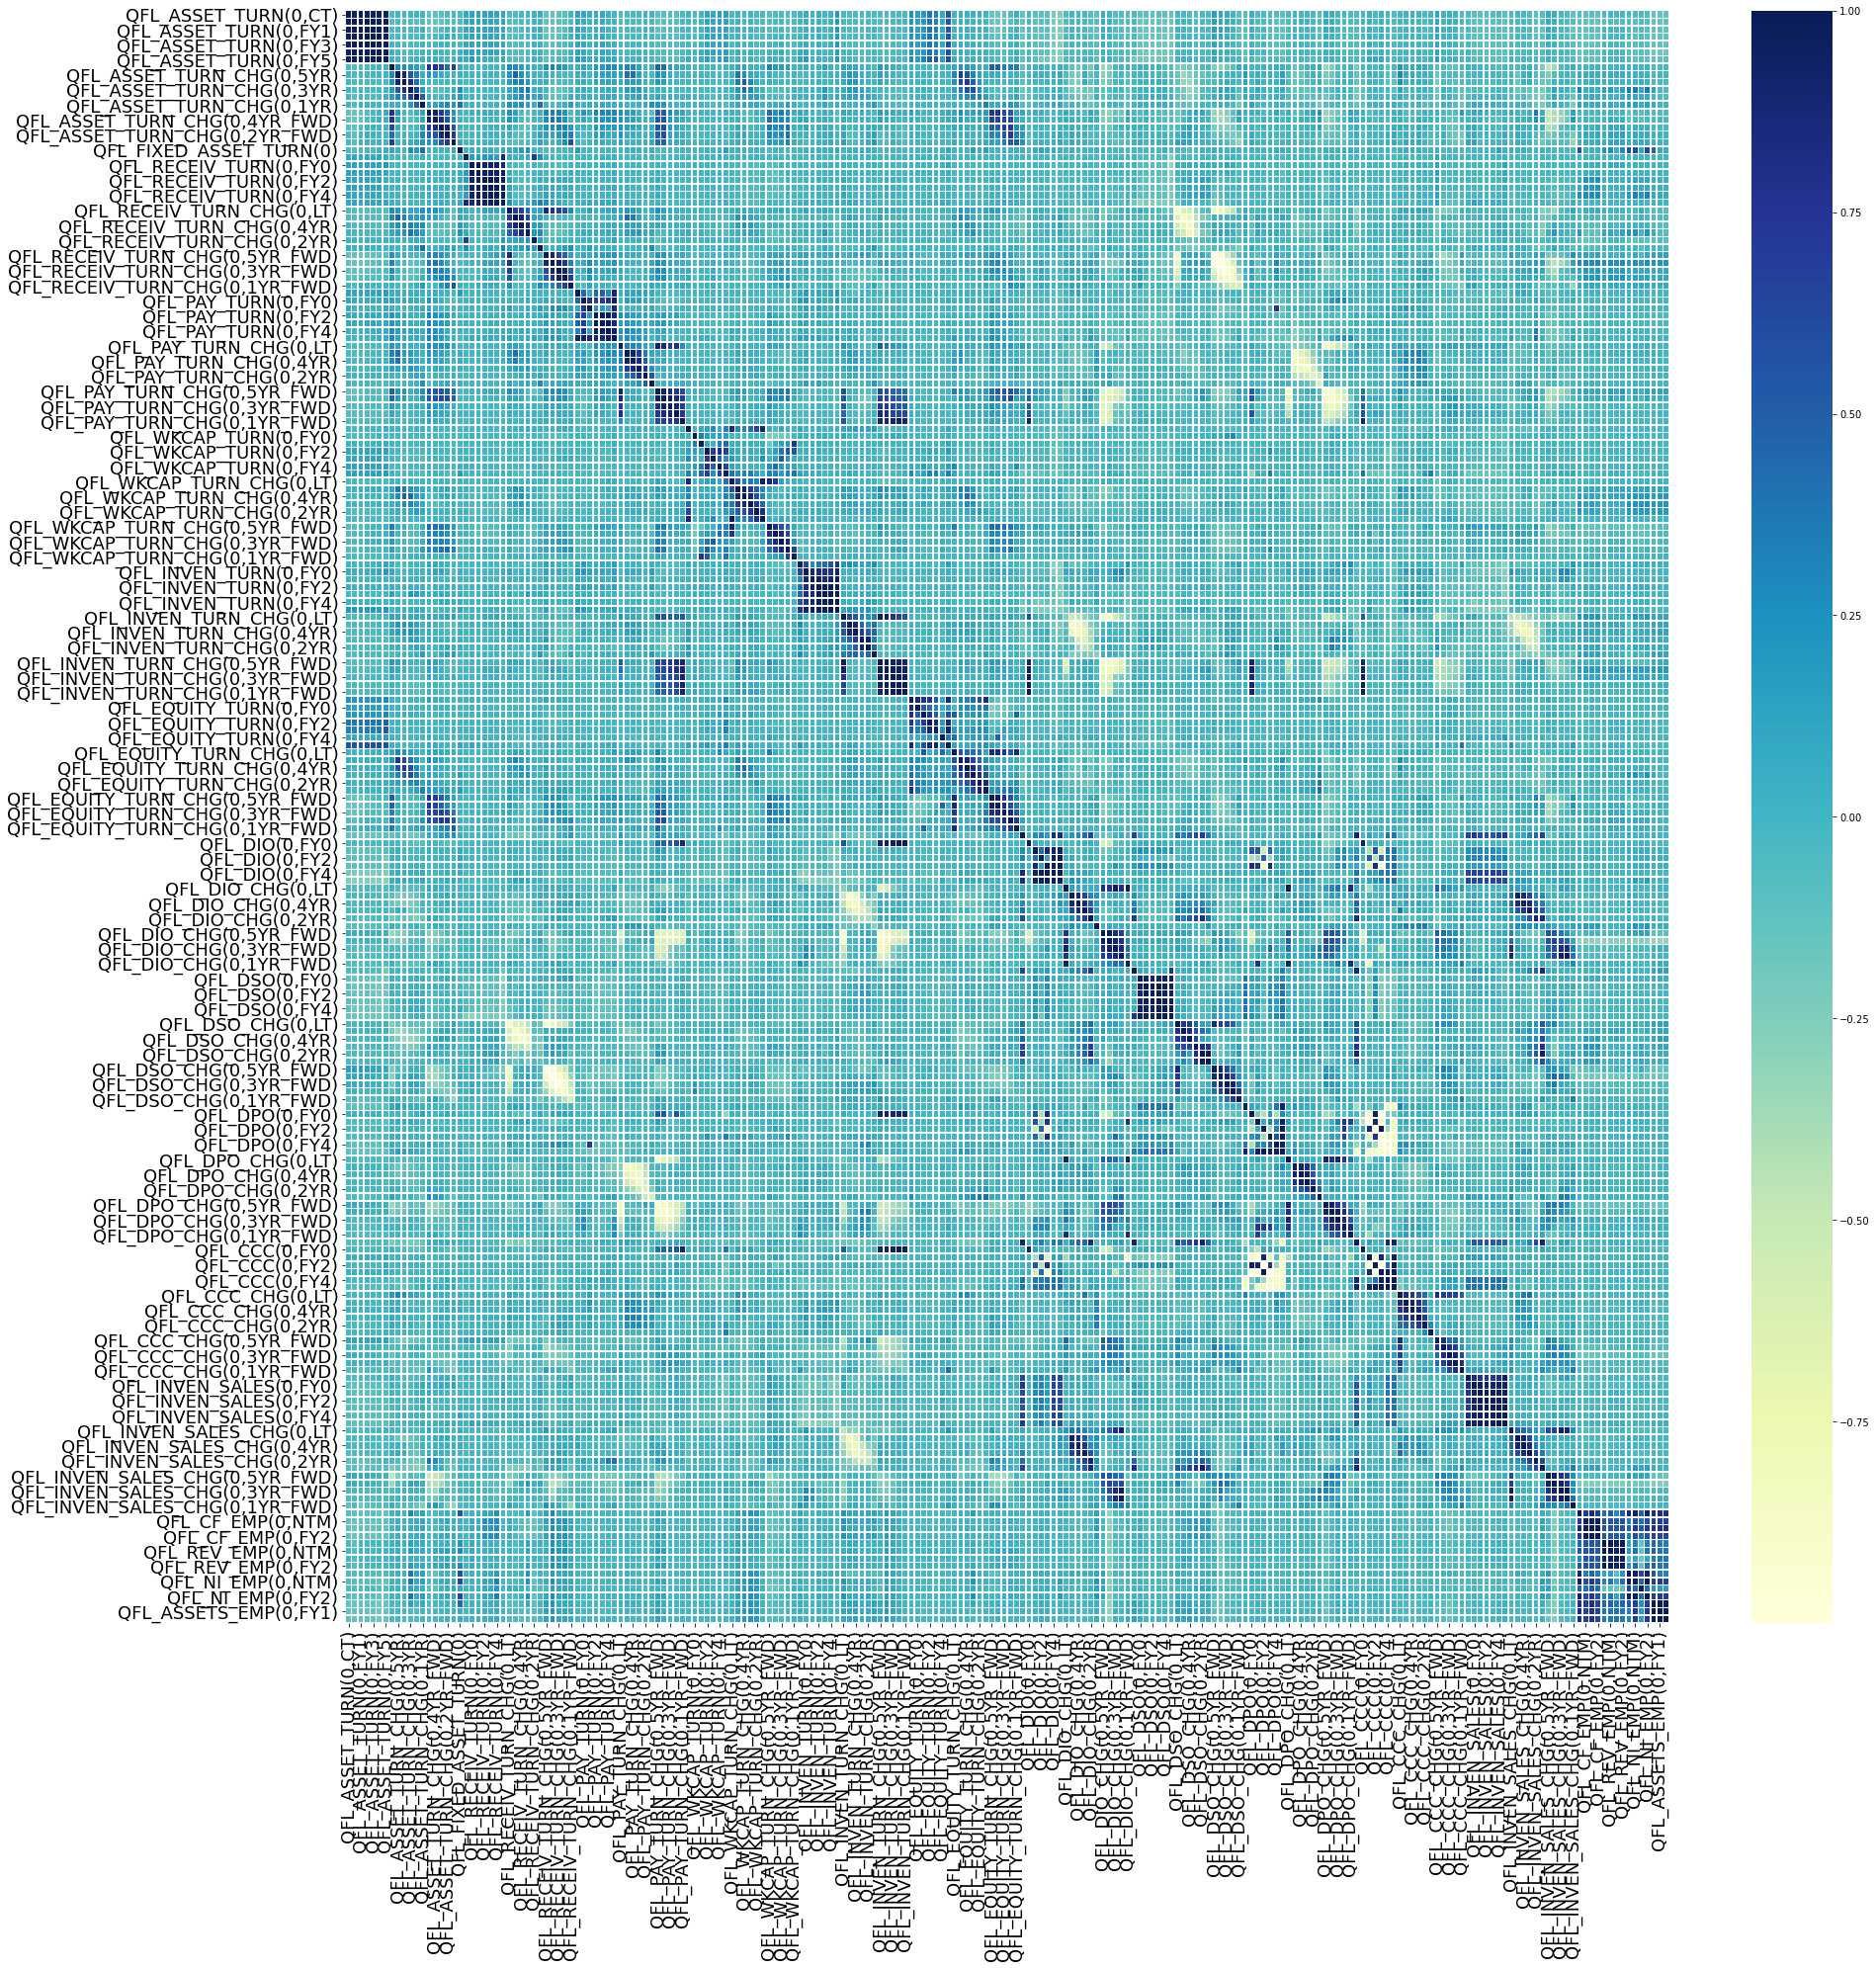

In [84]:
## Plot the correlation between each pair of factors

fig, ax = plt.subplots(figsize=(30,30))
hm = sns.heatmap(qfl_df[[c for c in qfl_df.columns[filter_idx]]].corr(), cmap="YlGnBu", annot = False, linewidths=.5, ax = ax)
hm.set_yticklabels(hm.get_ymajorticklabels(), fontsize = 18, rotation=0)
hm.set_xticklabels(hm.get_xmajorticklabels(), fontsize = 18, rotation=90)
plt.show()

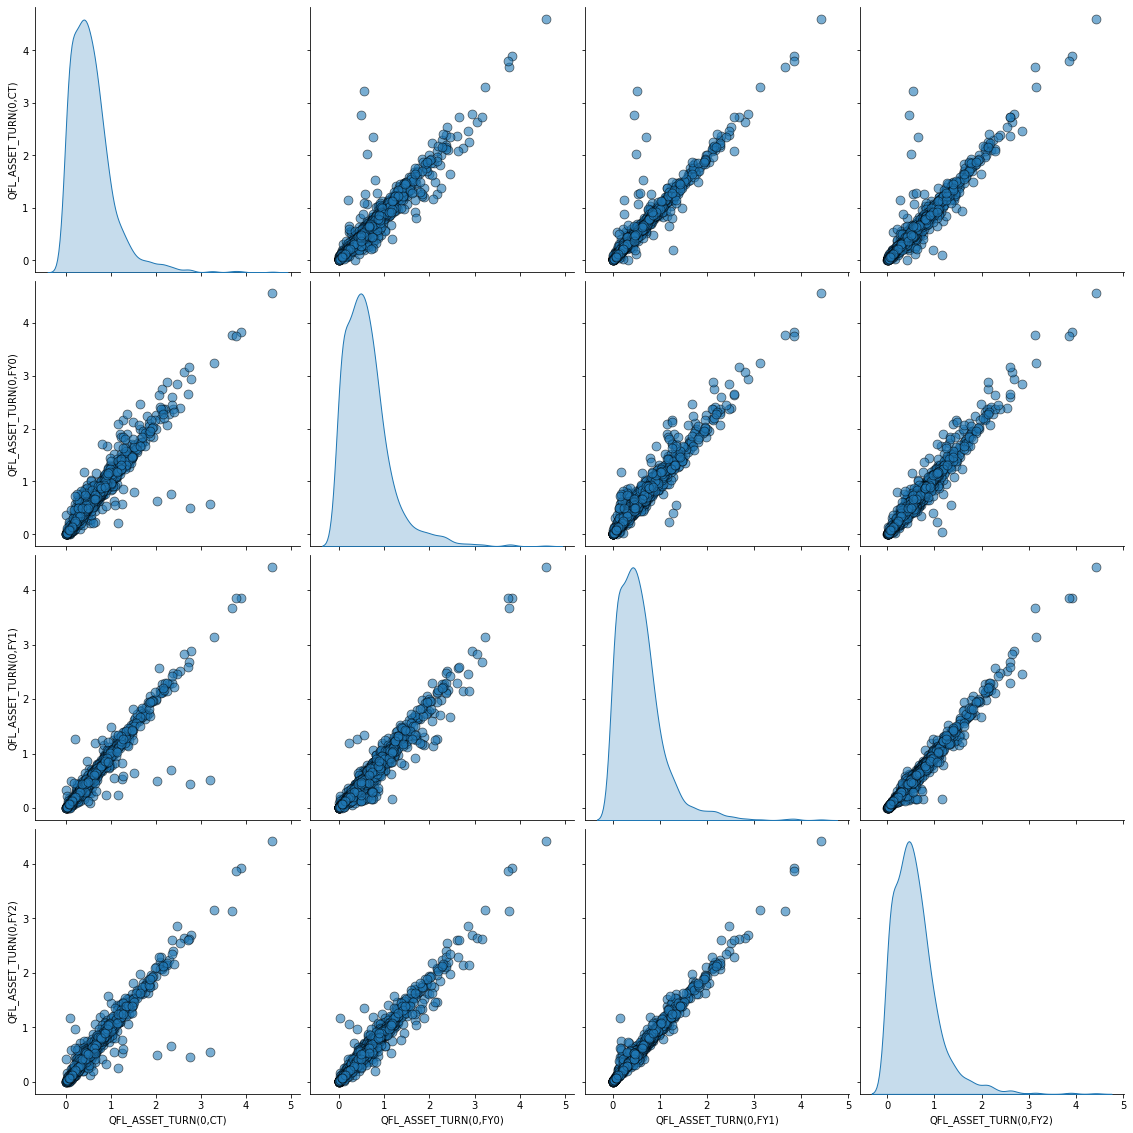

In [85]:
# Pairplot

sns.pairplot(qfl_df[qfl_df.columns[filter_idx[:4]].values], diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, height = 4);
#plt.show()

In [86]:
qfl_df[qfl_df.columns[filter_idx[:4]].values]

,"QFL_ASSET_TURN(0,CT)","QFL_ASSET_TURN(0,FY0)","QFL_ASSET_TURN(0,FY1)","QFL_ASSET_TURN(0,FY2)"
0,0.835433,0.828845,0.973893,1.017283
1,0.507461,0.486556,0.500111,0.502359
2,1.466792,1.446377,1.443106,1.365619
3,0.578754,0.612865,0.574301,0.582975
4,0.616632,0.518057,0.498840,0.531302
...,...,...,...,...
1595,0.079386,0.082665,0.077348,0.073496
1596,0.124810,0.135075,0.122557,0.118967
1597,0.067127,0.073197,0.068258,0.065899
1598,0.926694,1.161460,0.837770,1.048935


In [87]:
# Other Statistics

advanced_describe = {}
stats_table = pd.DataFrame()
for factor in list(qfl_df.columns[filter_idx].values):
    advanced_describe[factor] = stats.describe(qfl_df[factor].dropna(), axis=0)    
    adv_stats = {keys: [np.round(series, 2) for series in values] for (keys, values) in zip(advanced_describe.keys(), advanced_describe.values())}
    stats_table = pd.DataFrame(adv_stats, index=['nobs', 'minmax', 'mean', 'variance', 'skewness', 'kurtosis']).T
stats_table

,nobs,minmax,mean,variance,skewness,kurtosis
"QFL_ASSET_TURN(0,CT)",1596,"[-0.08, 4.6]",0.57,0.24,2.22,8.99
"QFL_ASSET_TURN(0,FY0)",1542,"[0.0, 4.57]",0.63,0.28,1.96,6.76
"QFL_ASSET_TURN(0,FY1)",1535,"[0.0, 4.43]",0.57,0.24,2.12,8.31
"QFL_ASSET_TURN(0,FY2)",1524,"[0.0, 4.43]",0.59,0.23,2.02,7.82
"QFL_ASSET_TURN(0,FY3)",1521,"[0.0, 4.43]",0.6,0.24,1.99,7.59
...,...,...,...,...,...,...
"QFL_NI_EMP(0,FY1)",1487,"[-16828654.0, 58311760.0]",143224,3.23863e+12,22.31,745.38
"QFL_NI_EMP(0,FY2)",1487,"[-3264699.8, 156293630.0]",350174,2.01924e+13,30.1,998.81
"QFL_ASSETS_EMP(0,CT)",1493,"[12466.4, 1568000000.0]",9.14641e+06,3.8147e+15,17.72,372.38
"QFL_ASSETS_EMP(0,FY1)",1431,"[11670.72, 1642601100.0]",7.99925e+06,3.16518e+15,21.59,557.5


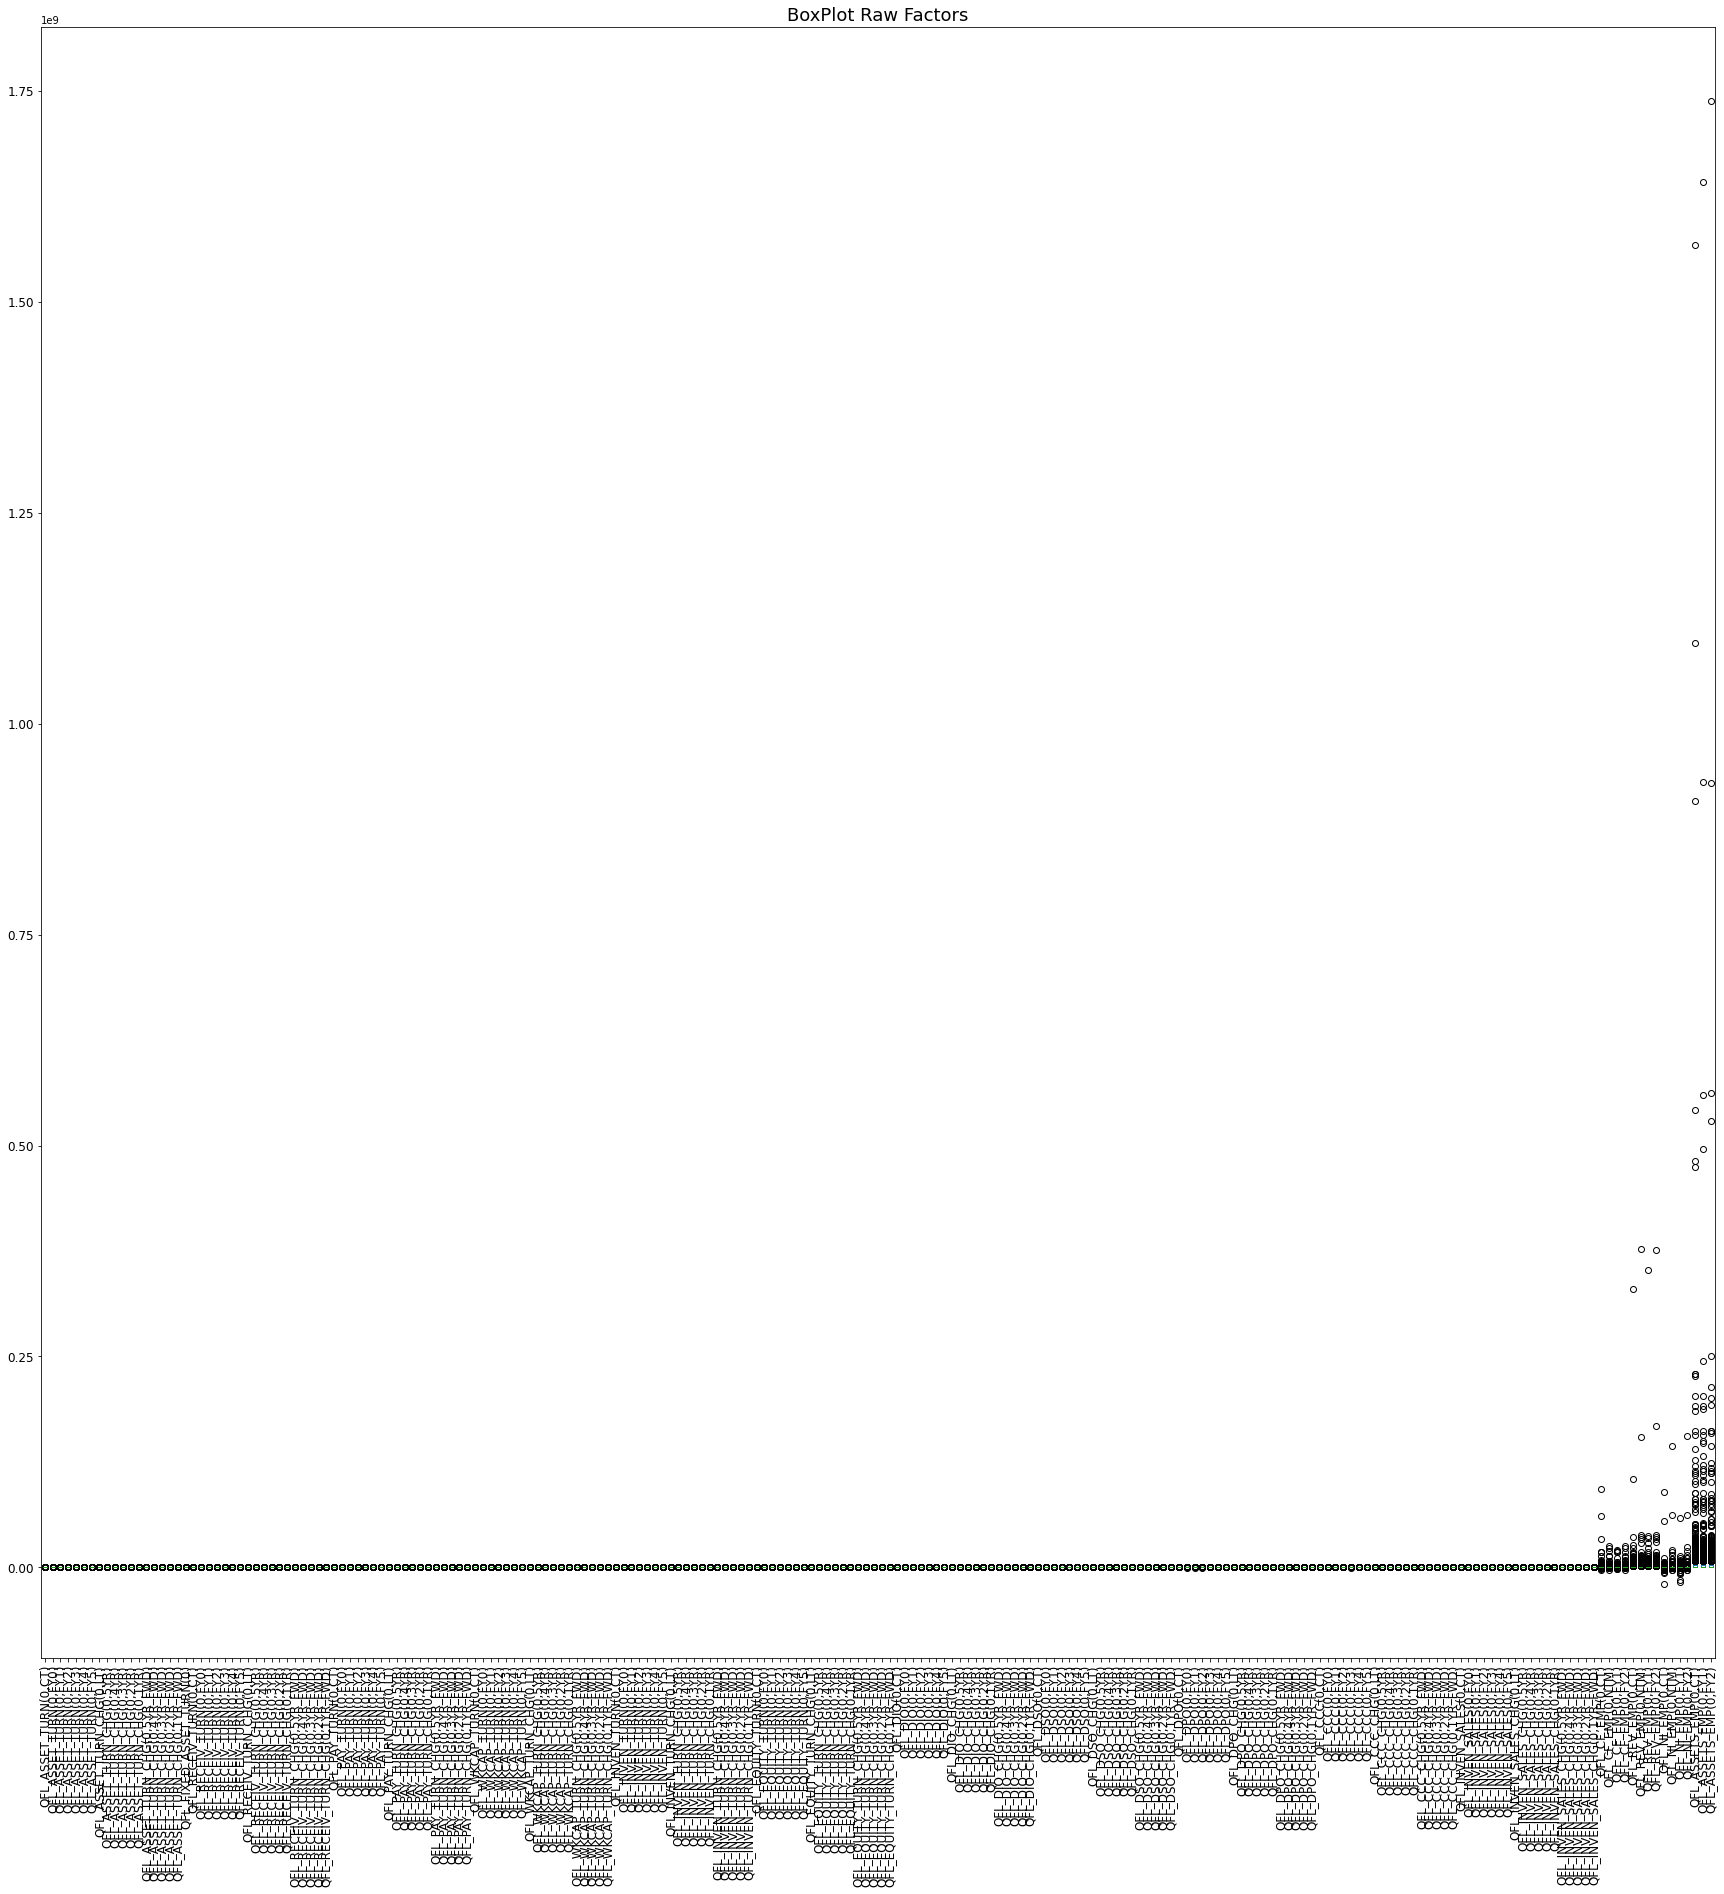

In [88]:
# Box-Whisker plot

qfl_df[qfl_df.columns[filter_idx]].boxplot(grid=False, rot=90, fontsize=12, figsize = (30,30)).set_title('BoxPlot Raw Factors', fontsize = 18);

In [89]:
# Z-Score

qfl_df_z = pd.DataFrame()

for factor in qfl_df[qfl_df.columns[filter_idx]]:
    z_score = ( qfl_df[factor] - qfl_df[factor].mean() ) / qfl_df[factor].std()
    qfl_df_z[factor] = z_score

qfl_df_z.describe()

,"QFL_ASSET_TURN(0,CT)","QFL_ASSET_TURN(0,FY0)","QFL_ASSET_TURN(0,FY1)","QFL_ASSET_TURN(0,FY2)","QFL_ASSET_TURN(0,FY3)","QFL_ASSET_TURN(0,FY4)","QFL_ASSET_TURN(0,FY5)","QFL_ASSET_TURN_CHG(0,LT)","QFL_ASSET_TURN_CHG(0,5YR)","QFL_ASSET_TURN_CHG(0,4YR)","QFL_ASSET_TURN_CHG(0,3YR)","QFL_ASSET_TURN_CHG(0,2YR)","QFL_ASSET_TURN_CHG(0,1YR)","QFL_ASSET_TURN_CHG(0,5YR_FWD)","QFL_ASSET_TURN_CHG(0,4YR_FWD)","QFL_ASSET_TURN_CHG(0,3YR_FWD)","QFL_ASSET_TURN_CHG(0,2YR_FWD)","QFL_ASSET_TURN_CHG(0,1YR_FWD)",QFL_FIXED_ASSET_TURN(0),"QFL_RECEIV_TURN(0,CT)","QFL_RECEIV_TURN(0,FY0)","QFL_RECEIV_TURN(0,FY1)","QFL_RECEIV_TURN(0,FY2)","QFL_RECEIV_TURN(0,FY3)","QFL_RECEIV_TURN(0,FY4)","QFL_RECEIV_TURN(0,FY5)","QFL_RECEIV_TURN_CHG(0,LT)","QFL_RECEIV_TURN_CHG(0,5YR)","QFL_RECEIV_TURN_CHG(0,4YR)","QFL_RECEIV_TURN_CHG(0,3YR)","QFL_RECEIV_TURN_CHG(0,2YR)","QFL_RECEIV_TURN_CHG(0,1YR)","QFL_RECEIV_TURN_CHG(0,5YR_FWD)","QFL_RECEIV_TURN_CHG(0,4YR_FWD)","QFL_RECEIV_TURN_CHG(0,3YR_FWD)","QFL_RECEIV_TURN_CHG(0,2YR_FWD)","QFL_RECEIV_TURN_CHG(0,1YR_FWD)","QFL_PAY_TURN(0,CT)","QFL_PAY_TURN(0,FY0)","QFL_PAY_TURN(0,FY1)","QFL_PAY_TURN(0,FY2)","QFL_PAY_TURN(0,FY3)","QFL_PAY_TURN(0,FY4)","QFL_PAY_TURN(0,FY5)","QFL_PAY_TURN_CHG(0,LT)","QFL_PAY_TURN_CHG(0,5YR)","QFL_PAY_TURN_CHG(0,4YR)","QFL_PAY_TURN_CHG(0,3YR)","QFL_PAY_TURN_CHG(0,2YR)","QFL_PAY_TURN_CHG(0,1YR)","QFL_PAY_TURN_CHG(0,5YR_FWD)","QFL_PAY_TURN_CHG(0,4YR_FWD)","QFL_PAY_TURN_CHG(0,3YR_FWD)","QFL_PAY_TURN_CHG(0,2YR_FWD)","QFL_PAY_TURN_CHG(0,1YR_FWD)","QFL_WKCAP_TURN(0,CT)","QFL_WKCAP_TURN(0,FY0)","QFL_WKCAP_TURN(0,FY1)","QFL_WKCAP_TURN(0,FY2)","QFL_WKCAP_TURN(0,FY3)","QFL_WKCAP_TURN(0,FY4)","QFL_WKCAP_TURN(0,FY5)","QFL_WKCAP_TURN_CHG(0,LT)","QFL_WKCAP_TURN_CHG(0,5YR)","QFL_WKCAP_TURN_CHG(0,4YR)","QFL_WKCAP_TURN_CHG(0,3YR)","QFL_WKCAP_TURN_CHG(0,2YR)","QFL_WKCAP_TURN_CHG(0,1YR)","QFL_WKCAP_TURN_CHG(0,5YR_FWD)","QFL_WKCAP_TURN_CHG(0,4YR_FWD)","QFL_WKCAP_TURN_CHG(0,3YR_FWD)","QFL_WKCAP_TURN_CHG(0,2YR_FWD)","QFL_WKCAP_TURN_CHG(0,1YR_FWD)","QFL_INVEN_TURN(0,CT)","QFL_INVEN_TURN(0,FY0)","QFL_INVEN_TURN(0,FY1)","QFL_INVEN_TURN(0,FY2)","QFL_INVEN_TURN(0,FY3)","QFL_INVEN_TURN(0,FY4)","QFL_INVEN_TURN(0,FY5)","QFL_INVEN_TURN_CHG(0,LT)","QFL_INVEN_TURN_CHG(0,5YR)","QFL_INVEN_TURN_CHG(0,4YR)","QFL_INVEN_TURN_CHG(0,3YR)","QFL_INVEN_TURN_CHG(0,2YR)","QFL_INVEN_TURN_CHG(0,1YR)","QFL_INVEN_TURN_CHG(0,5YR_FWD)","QFL_INVEN_TURN_CHG(0,4YR_FWD)","QFL_INVEN_TURN_CHG(0,3YR_FWD)","QFL_INVEN_TURN_CHG(0,2YR_FWD)","QFL_INVEN_TURN_CHG(0,1YR_FWD)","QFL_EQUITY_TURN(0,CT)","QFL_EQUITY_TURN(0,FY0)","QFL_EQUITY_TURN(0,FY1)","QFL_EQUITY_TURN(0,FY2)","QFL_EQUITY_TURN(0,FY3)","QFL_EQUITY_TURN(0,FY4)","QFL_EQUITY_TURN(0,FY5)","QFL_EQUITY_TURN_CHG(0,LT)","QFL_EQUITY_TURN_CHG(0,5YR)","QFL_EQUITY_TURN_CHG(0,4YR)","QFL_EQUITY_TURN_CHG(0,3YR)","QFL_EQUITY_TURN_CHG(0,2YR)","QFL_EQUITY_TURN_CHG(0,1YR)","QFL_EQUITY_TURN_CHG(0,5YR_FWD)","QFL_EQUITY_TURN_CHG(0,4YR_FWD)","QFL_EQUITY_TURN_CHG(0,3YR_FWD)","QFL_EQUITY_TURN_CHG(0,2YR_FWD)","QFL_EQUITY_TURN_CHG(0,1YR_FWD)","QFL_DIO(0,CT)","QFL_DIO(0,FY0)","QFL_DIO(0,FY1)","QFL_DIO(0,FY2)","QFL_DIO(0,FY3)","QFL_DIO(0,FY4)","QFL_DIO(0,FY5)","QFL_DIO_CHG(0,LT)","QFL_DIO_CHG(0,5YR)","QFL_DIO_CHG(0,4YR)","QFL_DIO_CHG(0,3YR)","QFL_DIO_CHG(0,2YR)","QFL_DIO_CHG(0,1YR)","QFL_DIO_CHG(0,5YR_FWD)","QFL_DIO_CHG(0,4YR_FWD)","QFL_DIO_CHG(0,3YR_FWD)","QFL_DIO_CHG(0,2YR_FWD)","QFL_DIO_CHG(0,1YR_FWD)","QFL_DSO(0,CT)","QFL_DSO(0,FY0)","QFL_DSO(0,FY1)","QFL_DSO(0,FY2)","QFL_DSO(0,FY3)","QFL_DSO(0,FY4)","QFL_DSO(0,FY5)","QFL_DSO_CHG(0,LT)","QFL_DSO_CHG(0,5YR)","QFL_DSO_CHG(0,4YR)","QFL_DSO_CHG(0,3YR)","QFL_DSO_CHG(0,2YR)","QFL_DSO_CHG(0,1YR)","QFL_DSO_CHG(0,5YR_FWD)","QFL_DSO_CHG(0,4YR_FWD)","QFL_DSO_CHG(0,3YR_FWD)","QFL_DSO_CHG(0,2YR_FWD)","QFL_DSO_CHG(0,1YR_FWD)","QFL_DPO(0,CT)","QFL_DPO(0,FY0)","QFL_DPO(0,FY1)","QFL_DPO(0,FY2)","QFL_DPO(0,FY3)","QFL_DPO(0,FY4)","QFL_DPO(0,FY5)","QFL_DPO_CHG(0,LT)","QFL_DPO_CHG(0,5YR)","QFL_DPO_CHG(0,4YR)","QFL_DPO_CHG(0,3YR)","QFL_DPO_CHG(0,2YR)","QFL_DPO_CHG(0,1YR)","QFL_DPO_CHG(0,5YR_FWD)","QFL_DP

In [90]:
# look for "extremely large" column's values after normalization (Descending)

for col_z in qfl_df_z:
    qfl_df_z[col_z] = qfl_df_z[col_z].sort_values(ignore_index=True, ascending = False)
    
qfl_df_z

,"QFL_ASSET_TURN(0,CT)","QFL_ASSET_TURN(0,FY0)","QFL_ASSET_TURN(0,FY1)","QFL_ASSET_TURN(0,FY2)","QFL_ASSET_TURN(0,FY3)","QFL_ASSET_TURN(0,FY4)","QFL_ASSET_TURN(0,FY5)","QFL_ASSET_TURN_CHG(0,LT)","QFL_ASSET_TURN_CHG(0,5YR)","QFL_ASSET_TURN_CHG(0,4YR)","QFL_ASSET_TURN_CHG(0,3YR)","QFL_ASSET_TURN_CHG(0,2YR)","QFL_ASSET_TURN_CHG(0,1YR)","QFL_ASSET_TURN_CHG(0,5YR_FWD)","QFL_ASSET_TURN_CHG(0,4YR_FWD)","QFL_ASSET_TURN_CHG(0,3YR_FWD)","QFL_ASSET_TURN_CHG(0,2YR_FWD)","QFL_ASSET_TURN_CHG(0,1YR_FWD)",QFL_FIXED_ASSET_TURN(0),"QFL_RECEIV_TURN(0,CT)","QFL_RECEIV_TURN(0,FY0)","QFL_RECEIV_TURN(0,FY1)","QFL_RECEIV_TURN(0,FY2)","QFL_RECEIV_TURN(0,FY3)","QFL_RECEIV_TURN(0,FY4)","QFL_RECEIV_TURN(0,FY5)","QFL_RECEIV_TURN_CHG(0,LT)","QFL_RECEIV_TURN_CHG(0,5YR)","QFL_RECEIV_TURN_CHG(0,4YR)","QFL_RECEIV_TURN_CHG(0,3YR)","QFL_RECEIV_TURN_CHG(0,2YR)","QFL_RECEIV_TURN_CHG(0,1YR)","QFL_RECEIV_TURN_CHG(0,5YR_FWD)","QFL_RECEIV_TURN_CHG(0,4YR_FWD)","QFL_RECEIV_TURN_CHG(0,3YR_FWD)","QFL_RECEIV_TURN_CHG(0,2YR_FWD)","QFL_RECEIV_TURN_CHG(0,1YR_FWD)","QFL_PAY_TURN(0,CT)","QFL_PAY_TURN(0,FY0)","QFL_PAY_TURN(0,FY1)","QFL_PAY_TURN(0,FY2)","QFL_PAY_TURN(0,FY3)","QFL_PAY_TURN(0,FY4)","QFL_PAY_TURN(0,FY5)","QFL_PAY_TURN_CHG(0,LT)","QFL_PAY_TURN_CHG(0,5YR)","QFL_PAY_TURN_CHG(0,4YR)","QFL_PAY_TURN_CHG(0,3YR)","QFL_PAY_TURN_CHG(0,2YR)","QFL_PAY_TURN_CHG(0,1YR)","QFL_PAY_TURN_CHG(0,5YR_FWD)","QFL_PAY_TURN_CHG(0,4YR_FWD)","QFL_PAY_TURN_CHG(0,3YR_FWD)","QFL_PAY_TURN_CHG(0,2YR_FWD)","QFL_PAY_TURN_CHG(0,1YR_FWD)","QFL_WKCAP_TURN(0,CT)","QFL_WKCAP_TURN(0,FY0)","QFL_WKCAP_TURN(0,FY1)","QFL_WKCAP_TURN(0,FY2)","QFL_WKCAP_TURN(0,FY3)","QFL_WKCAP_TURN(0,FY4)","QFL_WKCAP_TURN(0,FY5)","QFL_WKCAP_TURN_CHG(0,LT)","QFL_WKCAP_TURN_CHG(0,5YR)","QFL_WKCAP_TURN_CHG(0,4YR)","QFL_WKCAP_TURN_CHG(0,3YR)","QFL_WKCAP_TURN_CHG(0,2YR)","QFL_WKCAP_TURN_CHG(0,1YR)","QFL_WKCAP_TURN_CHG(0,5YR_FWD)","QFL_WKCAP_TURN_CHG(0,4YR_FWD)","QFL_WKCAP_TURN_CHG(0,3YR_FWD)","QFL_WKCAP_TURN_CHG(0,2YR_FWD)","QFL_WKCAP_TURN_CHG(0,1YR_FWD)","QFL_INVEN_TURN(0,CT)","QFL_INVEN_TURN(0,FY0)","QFL_INVEN_TURN(0,FY1)","QFL_INVEN_TURN(0,FY2)","QFL_INVEN_TURN(0,FY3)","QFL_INVEN_TURN(0,FY4)","QFL_INVEN_TURN(0,FY5)","QFL_INVEN_TURN_CHG(0,LT)","QFL_INVEN_TURN_CHG(0,5YR)","QFL_INVEN_TURN_CHG(0,4YR)","QFL_INVEN_TURN_CHG(0,3YR)","QFL_INVEN_TURN_CHG(0,2YR)","QFL_INVEN_TURN_CHG(0,1YR)","QFL_INVEN_TURN_CHG(0,5YR_FWD)","QFL_INVEN_TURN_CHG(0,4YR_FWD)","QFL_INVEN_TURN_CHG(0,3YR_FWD)","QFL_INVEN_TURN_CHG(0,2YR_FWD)","QFL_INVEN_TURN_CHG(0,1YR_FWD)","QFL_EQUITY_TURN(0,CT)","QFL_EQUITY_TURN(0,FY0)","QFL_EQUITY_TURN(0,FY1)","QFL_EQUITY_TURN(0,FY2)","QFL_EQUITY_TURN(0,FY3)","QFL_EQUITY_TURN(0,FY4)","QFL_EQUITY_TURN(0,FY5)","QFL_EQUITY_TURN_CHG(0,LT)","QFL_EQUITY_TURN_CHG(0,5YR)","QFL_EQUITY_TURN_CHG(0,4YR)","QFL_EQUITY_TURN_CHG(0,3YR)","QFL_EQUITY_TURN_CHG(0,2YR)","QFL_EQUITY_TURN_CHG(0,1YR)","QFL_EQUITY_TURN_CHG(0,5YR_FWD)","QFL_EQUITY_TURN_CHG(0,4YR_FWD)","QFL_EQUITY_TURN_CHG(0,3YR_FWD)","QFL_EQUITY_TURN_CHG(0,2YR_FWD)","QFL_EQUITY_TURN_CHG(0,1YR_FWD)","QFL_DIO(0,CT)","QFL_DIO(0,FY0)","QFL_DIO(0,FY1)","QFL_DIO(0,FY2)","QFL_DIO(0,FY3)","QFL_DIO(0,FY4)","QFL_DIO(0,FY5)","QFL_DIO_CHG(0,LT)","QFL_DIO_CHG(0,5YR)","QFL_DIO_CHG(0,4YR)","QFL_DIO_CHG(0,3YR)","QFL_DIO_CHG(0,2YR)","QFL_DIO_CHG(0,1YR)","QFL_DIO_CHG(0,5YR_FWD)","QFL_DIO_CHG(0,4YR_FWD)","QFL_DIO_CHG(0,3YR_FWD)","QFL_DIO_CHG(0,2YR_FWD)","QFL_DIO_CHG(0,1YR_FWD)","QFL_DSO(0,CT)","QFL_DSO(0,FY0)","QFL_DSO(0,FY1)","QFL_DSO(0,FY2)","QFL_DSO(0,FY3)","QFL_DSO(0,FY4)","QFL_DSO(0,FY5)","QFL_DSO_CHG(0,LT)","QFL_DSO_CHG(0,5YR)","QFL_DSO_CHG(0,4YR)","QFL_DSO_CHG(0,3YR)","QFL_DSO_CHG(0,2YR)","QFL_DSO_CHG(0,1YR)","QFL_DSO_CHG(0,5YR_FWD)","QFL_DSO_CHG(0,4YR_FWD)","QFL_DSO_CHG(0,3YR_FWD)","QFL_DSO_CHG(0,2YR_FWD)","QFL_DSO_CHG(0,1YR_FWD)","QFL_DPO(0,CT)","QFL_DPO(0,FY0)","QFL_DPO(0,FY1)","QFL_DPO(0,FY2)","QFL_DPO(0,FY3)","QFL_DPO(0,FY4)","QFL_DPO(0,FY5)","QFL_DPO_CHG(0,LT)","QFL_DPO_CHG(0,5YR)","QFL_DPO_CHG(0,4YR)","QFL_DPO_CHG(0,3YR)","QFL_DPO_CHG(0,2YR)","QFL_DPO_CHG(0,1YR)","QFL_DPO_CHG(0,5YR_FWD)","QFL_DP

In [91]:
# look for "extremely large" column's values after normalization (Ascending)

for col_z in qfl_df_z:
    qfl_df_z[col_z] = qfl_df_z[col_z].sort_values(ignore_index=True, ascending = True)
    
qfl_df_z

,"QFL_ASSET_TURN(0,CT)","QFL_ASSET_TURN(0,FY0)","QFL_ASSET_TURN(0,FY1)","QFL_ASSET_TURN(0,FY2)","QFL_ASSET_TURN(0,FY3)","QFL_ASSET_TURN(0,FY4)","QFL_ASSET_TURN(0,FY5)","QFL_ASSET_TURN_CHG(0,LT)","QFL_ASSET_TURN_CHG(0,5YR)","QFL_ASSET_TURN_CHG(0,4YR)","QFL_ASSET_TURN_CHG(0,3YR)","QFL_ASSET_TURN_CHG(0,2YR)","QFL_ASSET_TURN_CHG(0,1YR)","QFL_ASSET_TURN_CHG(0,5YR_FWD)","QFL_ASSET_TURN_CHG(0,4YR_FWD)","QFL_ASSET_TURN_CHG(0,3YR_FWD)","QFL_ASSET_TURN_CHG(0,2YR_FWD)","QFL_ASSET_TURN_CHG(0,1YR_FWD)",QFL_FIXED_ASSET_TURN(0),"QFL_RECEIV_TURN(0,CT)","QFL_RECEIV_TURN(0,FY0)","QFL_RECEIV_TURN(0,FY1)","QFL_RECEIV_TURN(0,FY2)","QFL_RECEIV_TURN(0,FY3)","QFL_RECEIV_TURN(0,FY4)","QFL_RECEIV_TURN(0,FY5)","QFL_RECEIV_TURN_CHG(0,LT)","QFL_RECEIV_TURN_CHG(0,5YR)","QFL_RECEIV_TURN_CHG(0,4YR)","QFL_RECEIV_TURN_CHG(0,3YR)","QFL_RECEIV_TURN_CHG(0,2YR)","QFL_RECEIV_TURN_CHG(0,1YR)","QFL_RECEIV_TURN_CHG(0,5YR_FWD)","QFL_RECEIV_TURN_CHG(0,4YR_FWD)","QFL_RECEIV_TURN_CHG(0,3YR_FWD)","QFL_RECEIV_TURN_CHG(0,2YR_FWD)","QFL_RECEIV_TURN_CHG(0,1YR_FWD)","QFL_PAY_TURN(0,CT)","QFL_PAY_TURN(0,FY0)","QFL_PAY_TURN(0,FY1)","QFL_PAY_TURN(0,FY2)","QFL_PAY_TURN(0,FY3)","QFL_PAY_TURN(0,FY4)","QFL_PAY_TURN(0,FY5)","QFL_PAY_TURN_CHG(0,LT)","QFL_PAY_TURN_CHG(0,5YR)","QFL_PAY_TURN_CHG(0,4YR)","QFL_PAY_TURN_CHG(0,3YR)","QFL_PAY_TURN_CHG(0,2YR)","QFL_PAY_TURN_CHG(0,1YR)","QFL_PAY_TURN_CHG(0,5YR_FWD)","QFL_PAY_TURN_CHG(0,4YR_FWD)","QFL_PAY_TURN_CHG(0,3YR_FWD)","QFL_PAY_TURN_CHG(0,2YR_FWD)","QFL_PAY_TURN_CHG(0,1YR_FWD)","QFL_WKCAP_TURN(0,CT)","QFL_WKCAP_TURN(0,FY0)","QFL_WKCAP_TURN(0,FY1)","QFL_WKCAP_TURN(0,FY2)","QFL_WKCAP_TURN(0,FY3)","QFL_WKCAP_TURN(0,FY4)","QFL_WKCAP_TURN(0,FY5)","QFL_WKCAP_TURN_CHG(0,LT)","QFL_WKCAP_TURN_CHG(0,5YR)","QFL_WKCAP_TURN_CHG(0,4YR)","QFL_WKCAP_TURN_CHG(0,3YR)","QFL_WKCAP_TURN_CHG(0,2YR)","QFL_WKCAP_TURN_CHG(0,1YR)","QFL_WKCAP_TURN_CHG(0,5YR_FWD)","QFL_WKCAP_TURN_CHG(0,4YR_FWD)","QFL_WKCAP_TURN_CHG(0,3YR_FWD)","QFL_WKCAP_TURN_CHG(0,2YR_FWD)","QFL_WKCAP_TURN_CHG(0,1YR_FWD)","QFL_INVEN_TURN(0,CT)","QFL_INVEN_TURN(0,FY0)","QFL_INVEN_TURN(0,FY1)","QFL_INVEN_TURN(0,FY2)","QFL_INVEN_TURN(0,FY3)","QFL_INVEN_TURN(0,FY4)","QFL_INVEN_TURN(0,FY5)","QFL_INVEN_TURN_CHG(0,LT)","QFL_INVEN_TURN_CHG(0,5YR)","QFL_INVEN_TURN_CHG(0,4YR)","QFL_INVEN_TURN_CHG(0,3YR)","QFL_INVEN_TURN_CHG(0,2YR)","QFL_INVEN_TURN_CHG(0,1YR)","QFL_INVEN_TURN_CHG(0,5YR_FWD)","QFL_INVEN_TURN_CHG(0,4YR_FWD)","QFL_INVEN_TURN_CHG(0,3YR_FWD)","QFL_INVEN_TURN_CHG(0,2YR_FWD)","QFL_INVEN_TURN_CHG(0,1YR_FWD)","QFL_EQUITY_TURN(0,CT)","QFL_EQUITY_TURN(0,FY0)","QFL_EQUITY_TURN(0,FY1)","QFL_EQUITY_TURN(0,FY2)","QFL_EQUITY_TURN(0,FY3)","QFL_EQUITY_TURN(0,FY4)","QFL_EQUITY_TURN(0,FY5)","QFL_EQUITY_TURN_CHG(0,LT)","QFL_EQUITY_TURN_CHG(0,5YR)","QFL_EQUITY_TURN_CHG(0,4YR)","QFL_EQUITY_TURN_CHG(0,3YR)","QFL_EQUITY_TURN_CHG(0,2YR)","QFL_EQUITY_TURN_CHG(0,1YR)","QFL_EQUITY_TURN_CHG(0,5YR_FWD)","QFL_EQUITY_TURN_CHG(0,4YR_FWD)","QFL_EQUITY_TURN_CHG(0,3YR_FWD)","QFL_EQUITY_TURN_CHG(0,2YR_FWD)","QFL_EQUITY_TURN_CHG(0,1YR_FWD)","QFL_DIO(0,CT)","QFL_DIO(0,FY0)","QFL_DIO(0,FY1)","QFL_DIO(0,FY2)","QFL_DIO(0,FY3)","QFL_DIO(0,FY4)","QFL_DIO(0,FY5)","QFL_DIO_CHG(0,LT)","QFL_DIO_CHG(0,5YR)","QFL_DIO_CHG(0,4YR)","QFL_DIO_CHG(0,3YR)","QFL_DIO_CHG(0,2YR)","QFL_DIO_CHG(0,1YR)","QFL_DIO_CHG(0,5YR_FWD)","QFL_DIO_CHG(0,4YR_FWD)","QFL_DIO_CHG(0,3YR_FWD)","QFL_DIO_CHG(0,2YR_FWD)","QFL_DIO_CHG(0,1YR_FWD)","QFL_DSO(0,CT)","QFL_DSO(0,FY0)","QFL_DSO(0,FY1)","QFL_DSO(0,FY2)","QFL_DSO(0,FY3)","QFL_DSO(0,FY4)","QFL_DSO(0,FY5)","QFL_DSO_CHG(0,LT)","QFL_DSO_CHG(0,5YR)","QFL_DSO_CHG(0,4YR)","QFL_DSO_CHG(0,3YR)","QFL_DSO_CHG(0,2YR)","QFL_DSO_CHG(0,1YR)","QFL_DSO_CHG(0,5YR_FWD)","QFL_DSO_CHG(0,4YR_FWD)","QFL_DSO_CHG(0,3YR_FWD)","QFL_DSO_CHG(0,2YR_FWD)","QFL_DSO_CHG(0,1YR_FWD)","QFL_DPO(0,CT)","QFL_DPO(0,FY0)","QFL_DPO(0,FY1)","QFL_DPO(0,FY2)","QFL_DPO(0,FY3)","QFL_DPO(0,FY4)","QFL_DPO(0,FY5)","QFL_DPO_CHG(0,LT)","QFL_DPO_CHG(0,5YR)","QFL_DPO_CHG(0,4YR)","QFL_DPO_CHG(0,3YR)","QFL_DPO_CHG(0,2YR)","QFL_DPO_CHG(0,1YR)","QFL_DPO_CHG(0,5YR_FWD)","QFL_DP

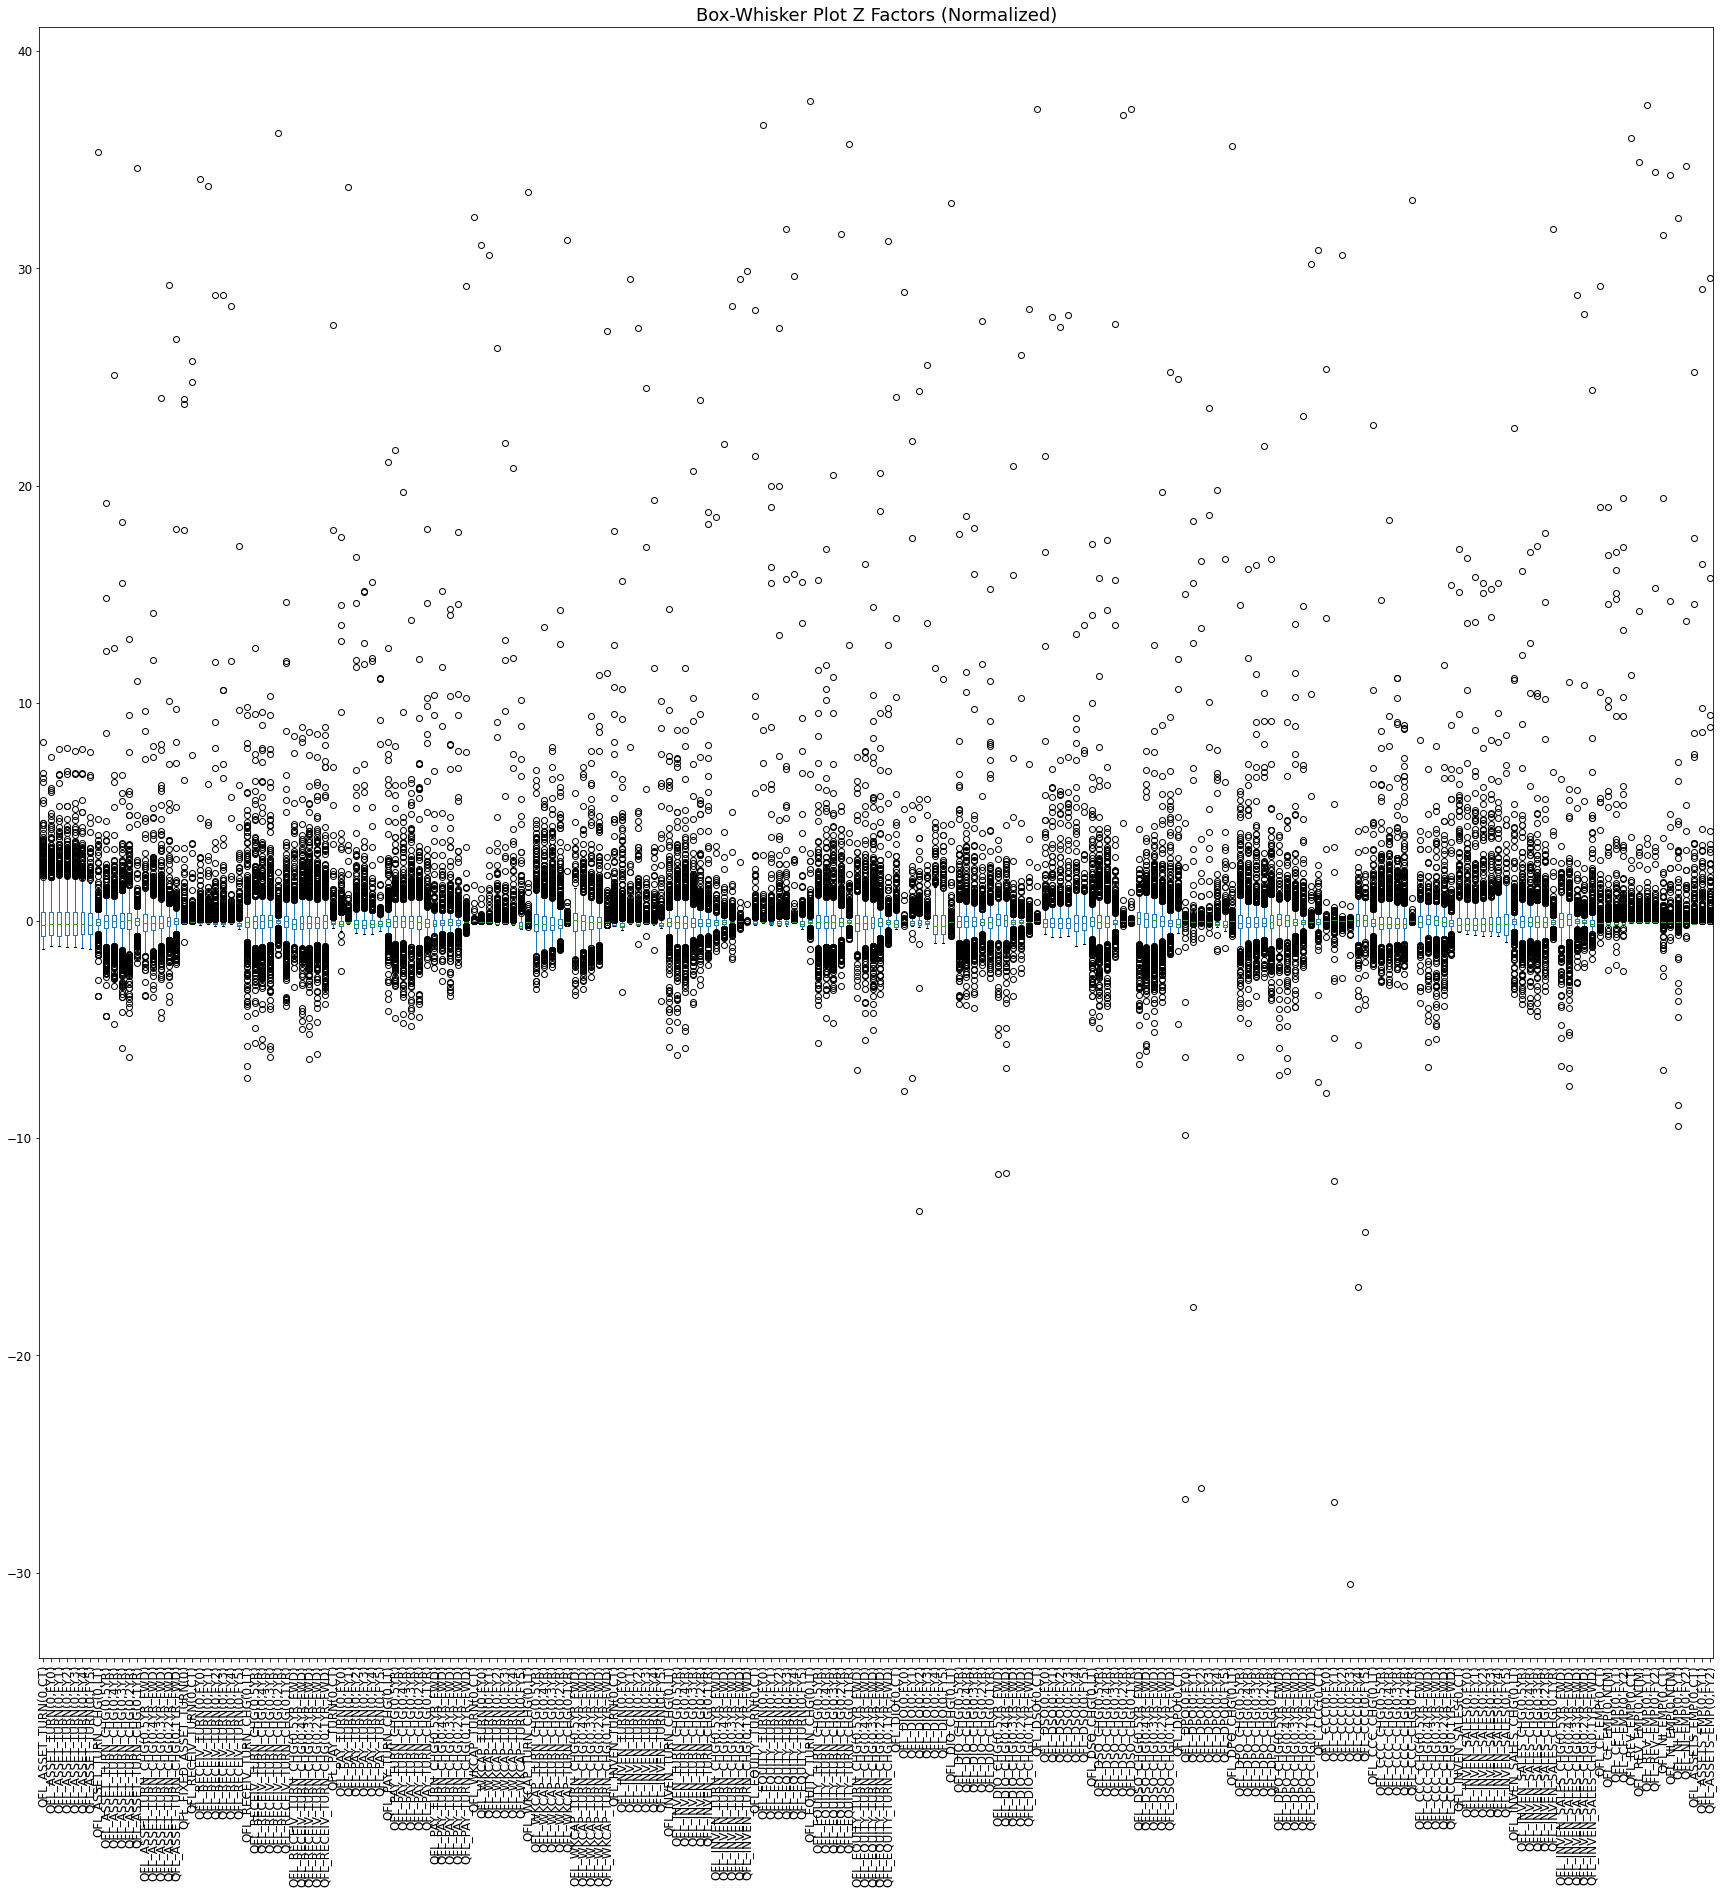

In [92]:
# Box-Whisker plot (Normalized data)

qfl_df_z.boxplot(grid=False, rot=90, fontsize=12, figsize = (30,30)).set_title('Box-Whisker Plot Z Factors (Normalized)', fontsize = 18);

In [95]:
# Greedy Multi-Factor Simple Average from all Multi-Factor's components

# MFR Z-Score

qfl_df_z['MFR'] = qfl_df_z.mean(axis = 1)

qfl_df_z.head()

,"QFL_ASSET_TURN(0,CT)","QFL_ASSET_TURN(0,FY0)","QFL_ASSET_TURN(0,FY1)","QFL_ASSET_TURN(0,FY2)","QFL_ASSET_TURN(0,FY3)","QFL_ASSET_TURN(0,FY4)","QFL_ASSET_TURN(0,FY5)","QFL_ASSET_TURN_CHG(0,LT)","QFL_ASSET_TURN_CHG(0,5YR)","QFL_ASSET_TURN_CHG(0,4YR)","QFL_ASSET_TURN_CHG(0,3YR)","QFL_ASSET_TURN_CHG(0,2YR)","QFL_ASSET_TURN_CHG(0,1YR)","QFL_ASSET_TURN_CHG(0,5YR_FWD)","QFL_ASSET_TURN_CHG(0,4YR_FWD)","QFL_ASSET_TURN_CHG(0,3YR_FWD)","QFL_ASSET_TURN_CHG(0,2YR_FWD)","QFL_ASSET_TURN_CHG(0,1YR_FWD)",QFL_FIXED_ASSET_TURN(0),"QFL_RECEIV_TURN(0,CT)","QFL_RECEIV_TURN(0,FY0)","QFL_RECEIV_TURN(0,FY1)","QFL_RECEIV_TURN(0,FY2)","QFL_RECEIV_TURN(0,FY3)","QFL_RECEIV_TURN(0,FY4)","QFL_RECEIV_TURN(0,FY5)","QFL_RECEIV_TURN_CHG(0,LT)","QFL_RECEIV_TURN_CHG(0,5YR)","QFL_RECEIV_TURN_CHG(0,4YR)","QFL_RECEIV_TURN_CHG(0,3YR)","QFL_RECEIV_TURN_CHG(0,2YR)","QFL_RECEIV_TURN_CHG(0,1YR)","QFL_RECEIV_TURN_CHG(0,5YR_FWD)","QFL_RECEIV_TURN_CHG(0,4YR_FWD)","QFL_RECEIV_TURN_CHG(0,3YR_FWD)","QFL_RECEIV_TURN_CHG(0,2YR_FWD)","QFL_RECEIV_TURN_CHG(0,1YR_FWD)","QFL_PAY_TURN(0,CT)","QFL_PAY_TURN(0,FY0)","QFL_PAY_TURN(0,FY1)","QFL_PAY_TURN(0,FY2)","QFL_PAY_TURN(0,FY3)","QFL_PAY_TURN(0,FY4)","QFL_PAY_TURN(0,FY5)","QFL_PAY_TURN_CHG(0,LT)","QFL_PAY_TURN_CHG(0,5YR)","QFL_PAY_TURN_CHG(0,4YR)","QFL_PAY_TURN_CHG(0,3YR)","QFL_PAY_TURN_CHG(0,2YR)","QFL_PAY_TURN_CHG(0,1YR)","QFL_PAY_TURN_CHG(0,5YR_FWD)","QFL_PAY_TURN_CHG(0,4YR_FWD)","QFL_PAY_TURN_CHG(0,3YR_FWD)","QFL_PAY_TURN_CHG(0,2YR_FWD)","QFL_PAY_TURN_CHG(0,1YR_FWD)","QFL_WKCAP_TURN(0,CT)","QFL_WKCAP_TURN(0,FY0)","QFL_WKCAP_TURN(0,FY1)","QFL_WKCAP_TURN(0,FY2)","QFL_WKCAP_TURN(0,FY3)","QFL_WKCAP_TURN(0,FY4)","QFL_WKCAP_TURN(0,FY5)","QFL_WKCAP_TURN_CHG(0,LT)","QFL_WKCAP_TURN_CHG(0,5YR)","QFL_WKCAP_TURN_CHG(0,4YR)","QFL_WKCAP_TURN_CHG(0,3YR)","QFL_WKCAP_TURN_CHG(0,2YR)","QFL_WKCAP_TURN_CHG(0,1YR)","QFL_WKCAP_TURN_CHG(0,5YR_FWD)","QFL_WKCAP_TURN_CHG(0,4YR_FWD)","QFL_WKCAP_TURN_CHG(0,3YR_FWD)","QFL_WKCAP_TURN_CHG(0,2YR_FWD)","QFL_WKCAP_TURN_CHG(0,1YR_FWD)","QFL_INVEN_TURN(0,CT)","QFL_INVEN_TURN(0,FY0)","QFL_INVEN_TURN(0,FY1)","QFL_INVEN_TURN(0,FY2)","QFL_INVEN_TURN(0,FY3)","QFL_INVEN_TURN(0,FY4)","QFL_INVEN_TURN(0,FY5)","QFL_INVEN_TURN_CHG(0,LT)","QFL_INVEN_TURN_CHG(0,5YR)","QFL_INVEN_TURN_CHG(0,4YR)","QFL_INVEN_TURN_CHG(0,3YR)","QFL_INVEN_TURN_CHG(0,2YR)","QFL_INVEN_TURN_CHG(0,1YR)","QFL_INVEN_TURN_CHG(0,5YR_FWD)","QFL_INVEN_TURN_CHG(0,4YR_FWD)","QFL_INVEN_TURN_CHG(0,3YR_FWD)","QFL_INVEN_TURN_CHG(0,2YR_FWD)","QFL_INVEN_TURN_CHG(0,1YR_FWD)","QFL_EQUITY_TURN(0,CT)","QFL_EQUITY_TURN(0,FY0)","QFL_EQUITY_TURN(0,FY1)","QFL_EQUITY_TURN(0,FY2)","QFL_EQUITY_TURN(0,FY3)","QFL_EQUITY_TURN(0,FY4)","QFL_EQUITY_TURN(0,FY5)","QFL_EQUITY_TURN_CHG(0,LT)","QFL_EQUITY_TURN_CHG(0,5YR)","QFL_EQUITY_TURN_CHG(0,4YR)","QFL_EQUITY_TURN_CHG(0,3YR)","QFL_EQUITY_TURN_CHG(0,2YR)","QFL_EQUITY_TURN_CHG(0,1YR)","QFL_EQUITY_TURN_CHG(0,5YR_FWD)","QFL_EQUITY_TURN_CHG(0,4YR_FWD)","QFL_EQUITY_TURN_CHG(0,3YR_FWD)","QFL_EQUITY_TURN_CHG(0,2YR_FWD)","QFL_EQUITY_TURN_CHG(0,1YR_FWD)","QFL_DIO(0,CT)","QFL_DIO(0,FY0)","QFL_DIO(0,FY1)","QFL_DIO(0,FY2)","QFL_DIO(0,FY3)","QFL_DIO(0,FY4)","QFL_DIO(0,FY5)","QFL_DIO_CHG(0,LT)","QFL_DIO_CHG(0,5YR)","QFL_DIO_CHG(0,4YR)","QFL_DIO_CHG(0,3YR)","QFL_DIO_CHG(0,2YR)","QFL_DIO_CHG(0,1YR)","QFL_DIO_CHG(0,5YR_FWD)","QFL_DIO_CHG(0,4YR_FWD)","QFL_DIO_CHG(0,3YR_FWD)","QFL_DIO_CHG(0,2YR_FWD)","QFL_DIO_CHG(0,1YR_FWD)","QFL_DSO(0,CT)","QFL_DSO(0,FY0)","QFL_DSO(0,FY1)","QFL_DSO(0,FY2)","QFL_DSO(0,FY3)","QFL_DSO(0,FY4)","QFL_DSO(0,FY5)","QFL_DSO_CHG(0,LT)","QFL_DSO_CHG(0,5YR)","QFL_DSO_CHG(0,4YR)","QFL_DSO_CHG(0,3YR)","QFL_DSO_CHG(0,2YR)","QFL_DSO_CHG(0,1YR)","QFL_DSO_CHG(0,5YR_FWD)","QFL_DSO_CHG(0,4YR_FWD)","QFL_DSO_CHG(0,3YR_FWD)","QFL_DSO_CHG(0,2YR_FWD)","QFL_DSO_CHG(0,1YR_FWD)","QFL_DPO(0,CT)","QFL_DPO(0,FY0)","QFL_DPO(0,FY1)","QFL_DPO(0,FY2)","QFL_DPO(0,FY3)","QFL_DPO(0,FY4)","QFL_DPO(0,FY5)","QFL_DPO_CHG(0,LT)","QFL_DPO_CHG(0,5YR)","QFL_DPO_CHG(0,4YR)","QFL_DPO_CHG(0,3YR)","QFL_DPO_CHG(0,2YR)","QFL_DPO_CHG(0,1YR)","QFL_DPO_CHG(0,5YR_FWD)","QFL_DP

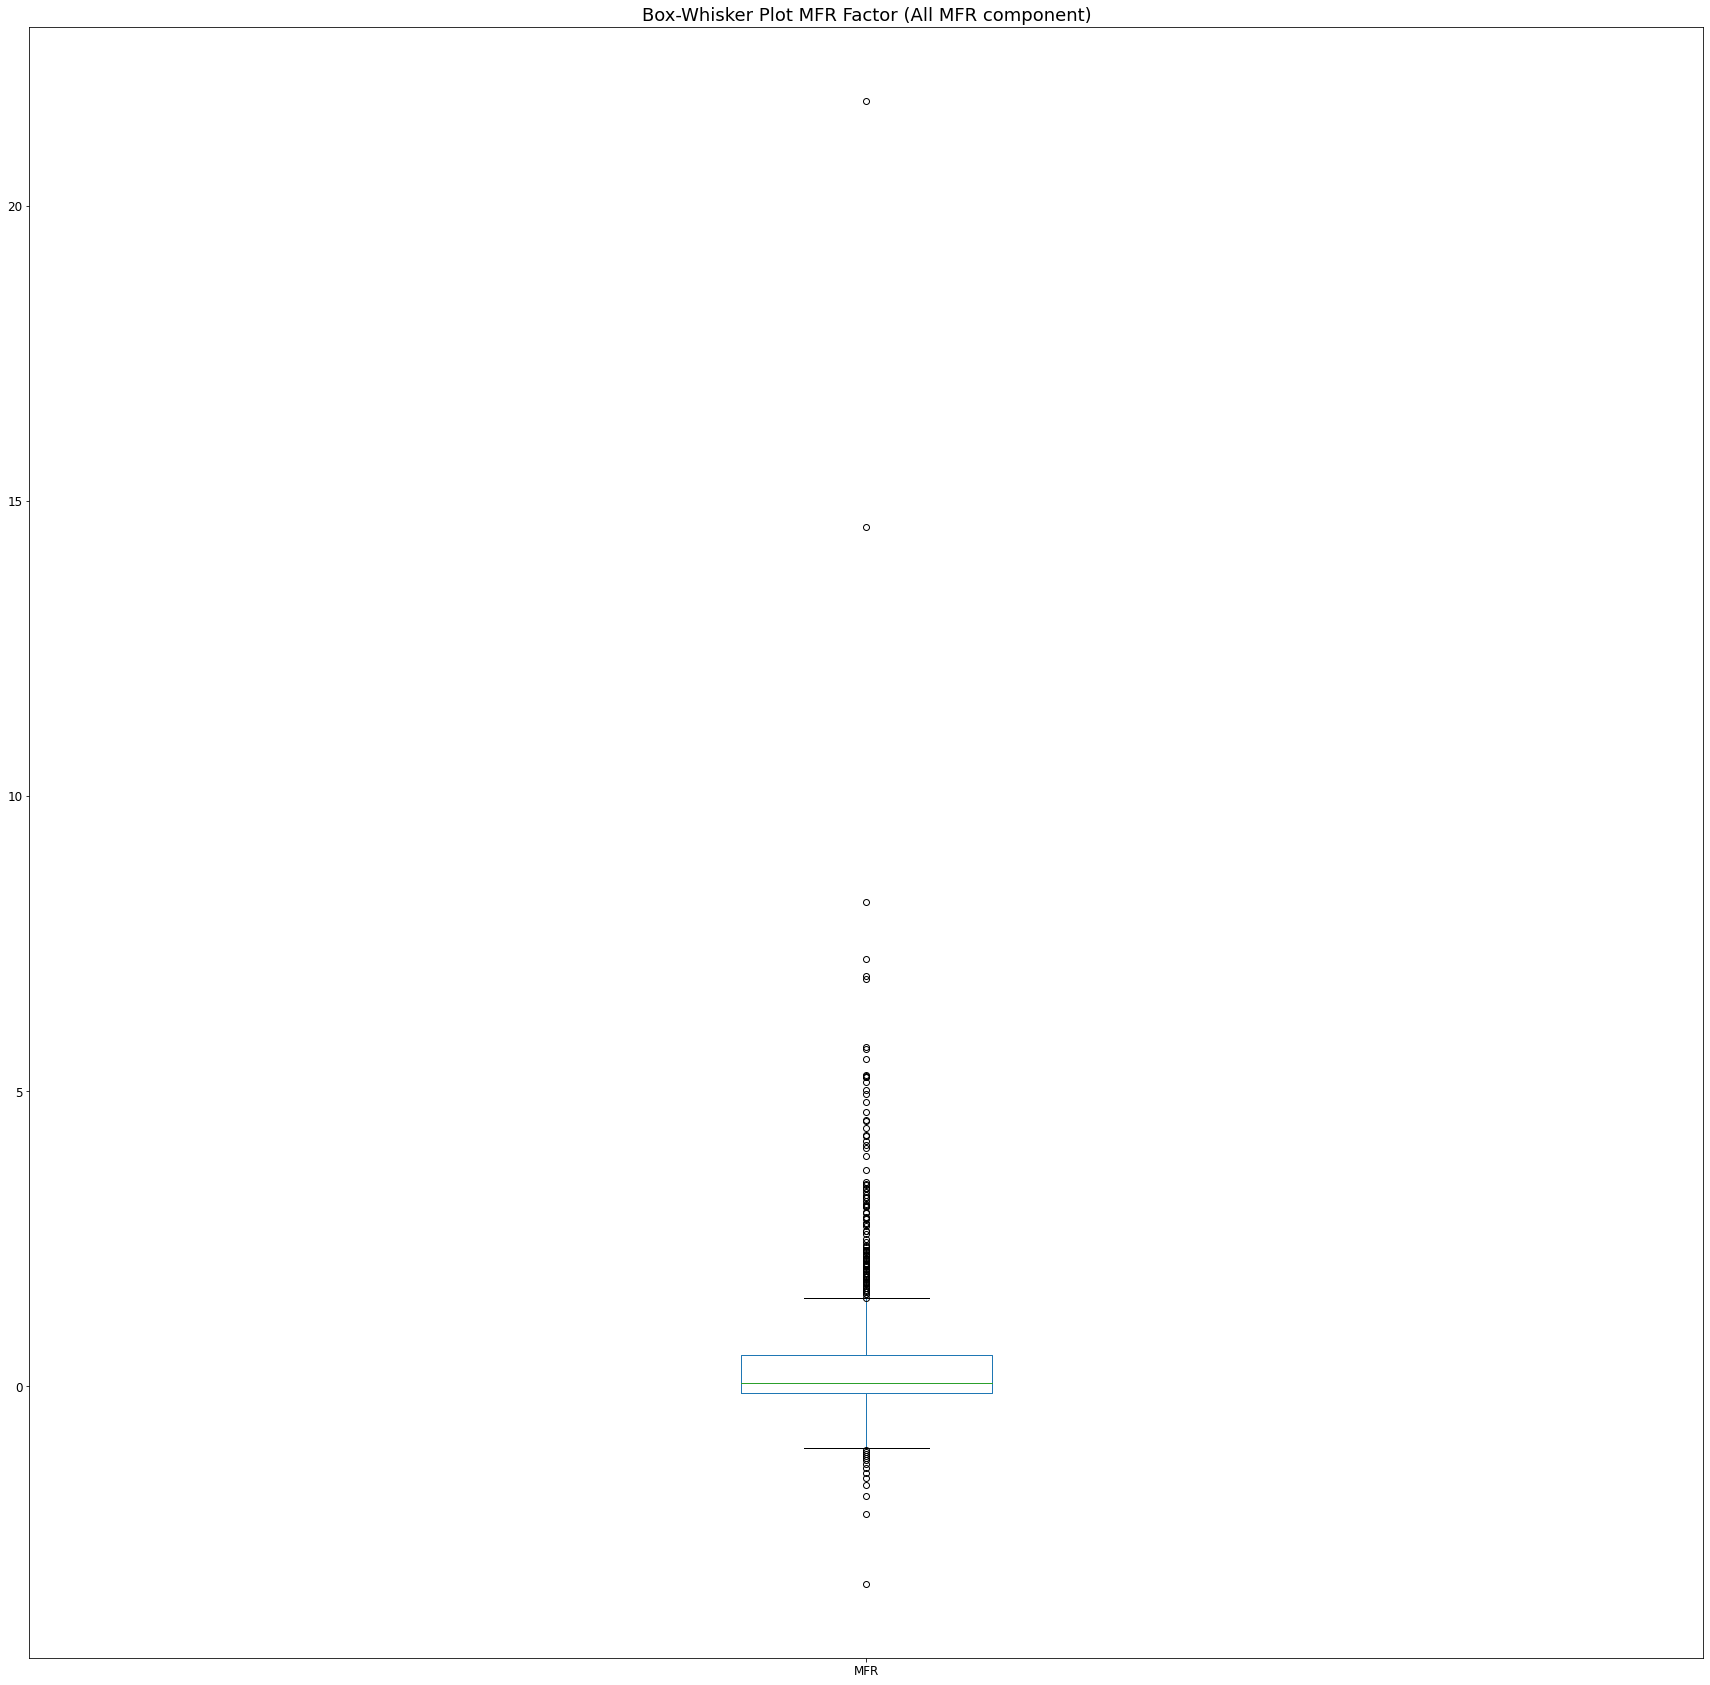

In [96]:
pd.DataFrame(qfl_df_z['MFR']).boxplot(grid=False, fontsize=12, figsize = (30,30)).set_title('Box-Whisker Plot MFR Factor (All MFR component)', fontsize = 18);

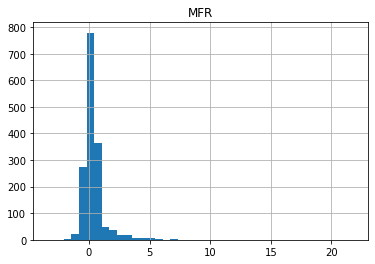

In [97]:
# MFR Distribution

pd.DataFrame(qfl_df_z['MFR']).hist(bins = int(np.sqrt(len(qfl_df_z['MFR']))));

In [98]:
# Check Infomation Coefficient: MFR (Components: All, Z-Scored Only)

sp_corr_z, sp_pval_z = stats.spearmanr(-qfl_df_z['MFR'].replace(np.nan, 0), qfl_df['p_total_return'].replace(np.nan, 0))
print('Information Coefficient: {0}'.format(round(sp_corr_z,2)))
print('Information Coefficient (P-Value): {0}'.format(round(sp_pval_z,2)))

Information Coefficient: 0.05
Information Coefficient (P-Value): 0.05


C:\Users\ffais\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


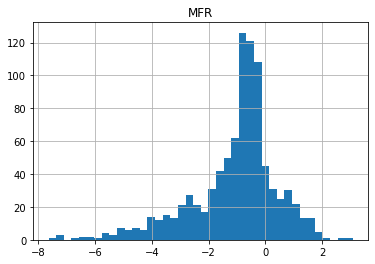

In [99]:
# MFR Log-Distribution

pd.DataFrame(np.log(qfl_df_z['MFR'])).hist(bins = int(np.sqrt(len(qfl_df_z['MFR']))));

In [100]:
# Log-Transformation for positive/not-zero features

qfl_df_log = pd.DataFrame()

for col_pos in qfl_df[qfl_df.columns[filter_idx]]:
    if np.sum(qfl_df[qfl_df.columns[filter_idx]][col_pos] <= 0) == 0:
        qfl_df_log[col_pos] = np.log(qfl_df[qfl_df.columns[filter_idx]][col_pos])
    else:
        qfl_df_log[col_pos] = qfl_df[qfl_df.columns[filter_idx]][col_pos]
    
qfl_df_log

,"QFL_ASSET_TURN(0,CT)","QFL_ASSET_TURN(0,FY0)","QFL_ASSET_TURN(0,FY1)","QFL_ASSET_TURN(0,FY2)","QFL_ASSET_TURN(0,FY3)","QFL_ASSET_TURN(0,FY4)","QFL_ASSET_TURN(0,FY5)","QFL_ASSET_TURN_CHG(0,LT)","QFL_ASSET_TURN_CHG(0,5YR)","QFL_ASSET_TURN_CHG(0,4YR)","QFL_ASSET_TURN_CHG(0,3YR)","QFL_ASSET_TURN_CHG(0,2YR)","QFL_ASSET_TURN_CHG(0,1YR)","QFL_ASSET_TURN_CHG(0,5YR_FWD)","QFL_ASSET_TURN_CHG(0,4YR_FWD)","QFL_ASSET_TURN_CHG(0,3YR_FWD)","QFL_ASSET_TURN_CHG(0,2YR_FWD)","QFL_ASSET_TURN_CHG(0,1YR_FWD)",QFL_FIXED_ASSET_TURN(0),"QFL_RECEIV_TURN(0,CT)","QFL_RECEIV_TURN(0,FY0)","QFL_RECEIV_TURN(0,FY1)","QFL_RECEIV_TURN(0,FY2)","QFL_RECEIV_TURN(0,FY3)","QFL_RECEIV_TURN(0,FY4)","QFL_RECEIV_TURN(0,FY5)","QFL_RECEIV_TURN_CHG(0,LT)","QFL_RECEIV_TURN_CHG(0,5YR)","QFL_RECEIV_TURN_CHG(0,4YR)","QFL_RECEIV_TURN_CHG(0,3YR)","QFL_RECEIV_TURN_CHG(0,2YR)","QFL_RECEIV_TURN_CHG(0,1YR)","QFL_RECEIV_TURN_CHG(0,5YR_FWD)","QFL_RECEIV_TURN_CHG(0,4YR_FWD)","QFL_RECEIV_TURN_CHG(0,3YR_FWD)","QFL_RECEIV_TURN_CHG(0,2YR_FWD)","QFL_RECEIV_TURN_CHG(0,1YR_FWD)","QFL_PAY_TURN(0,CT)","QFL_PAY_TURN(0,FY0)","QFL_PAY_TURN(0,FY1)","QFL_PAY_TURN(0,FY2)","QFL_PAY_TURN(0,FY3)","QFL_PAY_TURN(0,FY4)","QFL_PAY_TURN(0,FY5)","QFL_PAY_TURN_CHG(0,LT)","QFL_PAY_TURN_CHG(0,5YR)","QFL_PAY_TURN_CHG(0,4YR)","QFL_PAY_TURN_CHG(0,3YR)","QFL_PAY_TURN_CHG(0,2YR)","QFL_PAY_TURN_CHG(0,1YR)","QFL_PAY_TURN_CHG(0,5YR_FWD)","QFL_PAY_TURN_CHG(0,4YR_FWD)","QFL_PAY_TURN_CHG(0,3YR_FWD)","QFL_PAY_TURN_CHG(0,2YR_FWD)","QFL_PAY_TURN_CHG(0,1YR_FWD)","QFL_WKCAP_TURN(0,CT)","QFL_WKCAP_TURN(0,FY0)","QFL_WKCAP_TURN(0,FY1)","QFL_WKCAP_TURN(0,FY2)","QFL_WKCAP_TURN(0,FY3)","QFL_WKCAP_TURN(0,FY4)","QFL_WKCAP_TURN(0,FY5)","QFL_WKCAP_TURN_CHG(0,LT)","QFL_WKCAP_TURN_CHG(0,5YR)","QFL_WKCAP_TURN_CHG(0,4YR)","QFL_WKCAP_TURN_CHG(0,3YR)","QFL_WKCAP_TURN_CHG(0,2YR)","QFL_WKCAP_TURN_CHG(0,1YR)","QFL_WKCAP_TURN_CHG(0,5YR_FWD)","QFL_WKCAP_TURN_CHG(0,4YR_FWD)","QFL_WKCAP_TURN_CHG(0,3YR_FWD)","QFL_WKCAP_TURN_CHG(0,2YR_FWD)","QFL_WKCAP_TURN_CHG(0,1YR_FWD)","QFL_INVEN_TURN(0,CT)","QFL_INVEN_TURN(0,FY0)","QFL_INVEN_TURN(0,FY1)","QFL_INVEN_TURN(0,FY2)","QFL_INVEN_TURN(0,FY3)","QFL_INVEN_TURN(0,FY4)","QFL_INVEN_TURN(0,FY5)","QFL_INVEN_TURN_CHG(0,LT)","QFL_INVEN_TURN_CHG(0,5YR)","QFL_INVEN_TURN_CHG(0,4YR)","QFL_INVEN_TURN_CHG(0,3YR)","QFL_INVEN_TURN_CHG(0,2YR)","QFL_INVEN_TURN_CHG(0,1YR)","QFL_INVEN_TURN_CHG(0,5YR_FWD)","QFL_INVEN_TURN_CHG(0,4YR_FWD)","QFL_INVEN_TURN_CHG(0,3YR_FWD)","QFL_INVEN_TURN_CHG(0,2YR_FWD)","QFL_INVEN_TURN_CHG(0,1YR_FWD)","QFL_EQUITY_TURN(0,CT)","QFL_EQUITY_TURN(0,FY0)","QFL_EQUITY_TURN(0,FY1)","QFL_EQUITY_TURN(0,FY2)","QFL_EQUITY_TURN(0,FY3)","QFL_EQUITY_TURN(0,FY4)","QFL_EQUITY_TURN(0,FY5)","QFL_EQUITY_TURN_CHG(0,LT)","QFL_EQUITY_TURN_CHG(0,5YR)","QFL_EQUITY_TURN_CHG(0,4YR)","QFL_EQUITY_TURN_CHG(0,3YR)","QFL_EQUITY_TURN_CHG(0,2YR)","QFL_EQUITY_TURN_CHG(0,1YR)","QFL_EQUITY_TURN_CHG(0,5YR_FWD)","QFL_EQUITY_TURN_CHG(0,4YR_FWD)","QFL_EQUITY_TURN_CHG(0,3YR_FWD)","QFL_EQUITY_TURN_CHG(0,2YR_FWD)","QFL_EQUITY_TURN_CHG(0,1YR_FWD)","QFL_DIO(0,CT)","QFL_DIO(0,FY0)","QFL_DIO(0,FY1)","QFL_DIO(0,FY2)","QFL_DIO(0,FY3)","QFL_DIO(0,FY4)","QFL_DIO(0,FY5)","QFL_DIO_CHG(0,LT)","QFL_DIO_CHG(0,5YR)","QFL_DIO_CHG(0,4YR)","QFL_DIO_CHG(0,3YR)","QFL_DIO_CHG(0,2YR)","QFL_DIO_CHG(0,1YR)","QFL_DIO_CHG(0,5YR_FWD)","QFL_DIO_CHG(0,4YR_FWD)","QFL_DIO_CHG(0,3YR_FWD)","QFL_DIO_CHG(0,2YR_FWD)","QFL_DIO_CHG(0,1YR_FWD)","QFL_DSO(0,CT)","QFL_DSO(0,FY0)","QFL_DSO(0,FY1)","QFL_DSO(0,FY2)","QFL_DSO(0,FY3)","QFL_DSO(0,FY4)","QFL_DSO(0,FY5)","QFL_DSO_CHG(0,LT)","QFL_DSO_CHG(0,5YR)","QFL_DSO_CHG(0,4YR)","QFL_DSO_CHG(0,3YR)","QFL_DSO_CHG(0,2YR)","QFL_DSO_CHG(0,1YR)","QFL_DSO_CHG(0,5YR_FWD)","QFL_DSO_CHG(0,4YR_FWD)","QFL_DSO_CHG(0,3YR_FWD)","QFL_DSO_CHG(0,2YR_FWD)","QFL_DSO_CHG(0,1YR_FWD)","QFL_DPO(0,CT)","QFL_DPO(0,FY0)","QFL_DPO(0,FY1)","QFL_DPO(0,FY2)","QFL_DPO(0,FY3)","QFL_DPO(0,FY4)","QFL_DPO(0,FY5)","QFL_DPO_CHG(0,LT)","QFL_DPO_CHG(0,5YR)","QFL_DPO_CHG(0,4YR)","QFL_DPO_CHG(0,3YR)","QFL_DPO_CHG(0,2YR)","QFL_DPO_CHG(0,1YR)","QFL_DPO_CHG(0,5YR_FWD)","QFL_DP

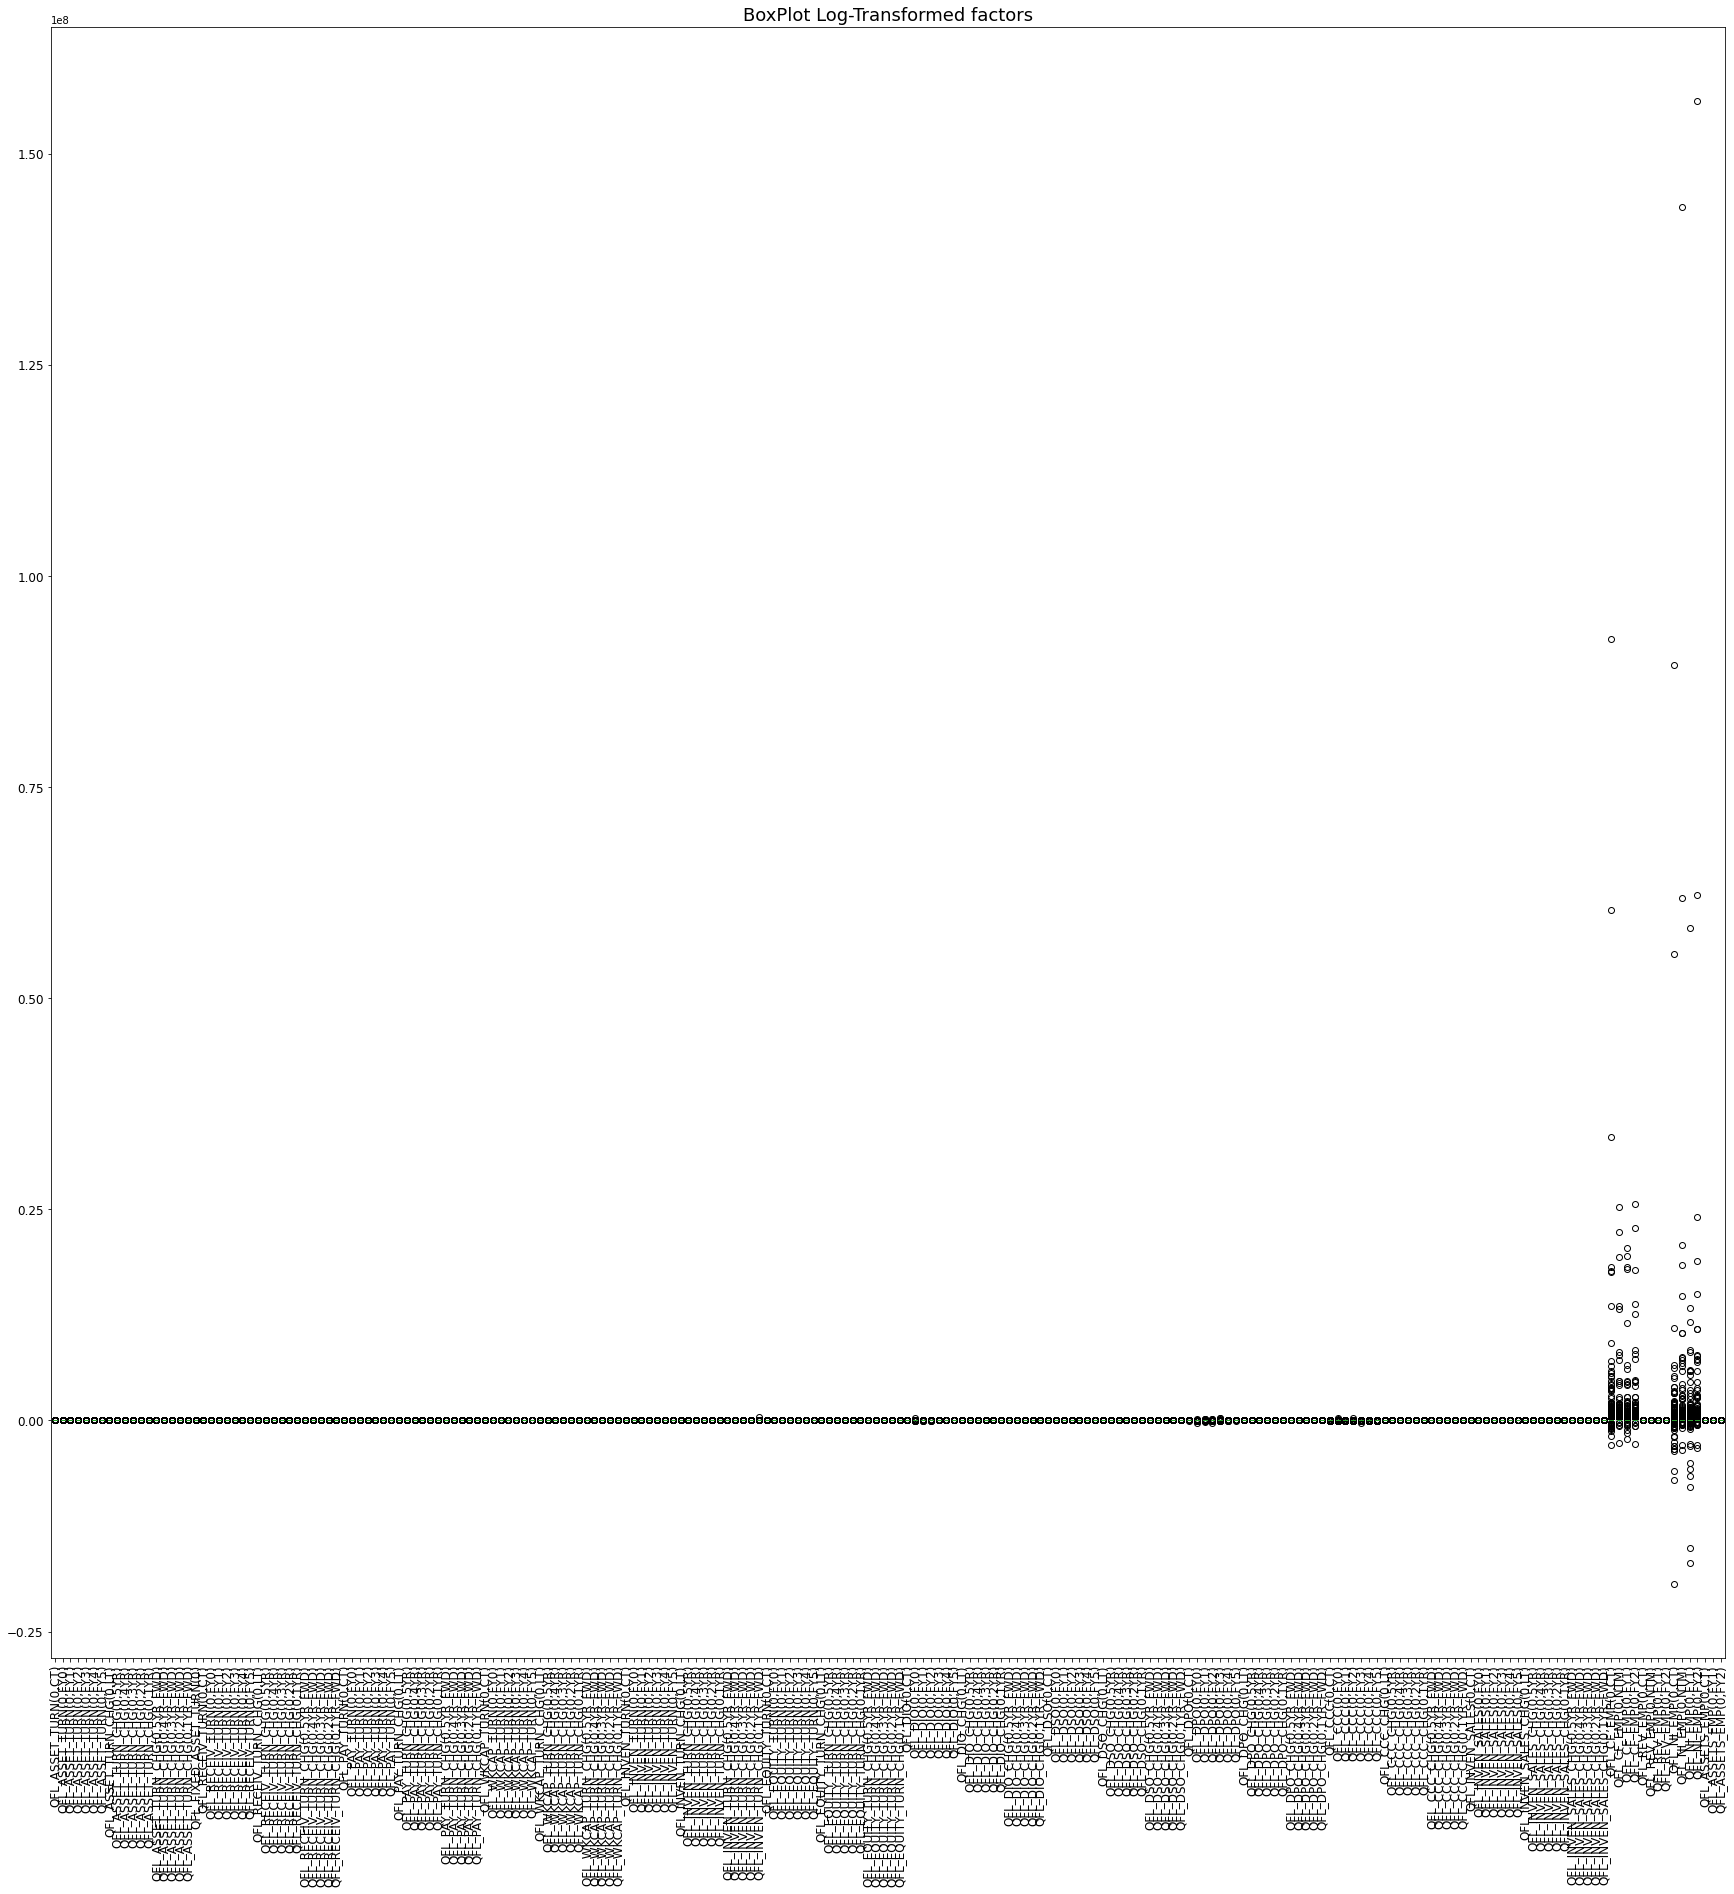

In [101]:
# Box-Whisker plot of Log-Transformed data

qfl_df_log.boxplot(grid=False, rot=90, fontsize=12, figsize = (30,30)).set_title('BoxPlot Log-Transformed factors', fontsize = 18);

In [102]:
# MFR Z-Score of Log-Transformed and Z-Scored data

# Z-Score of Log-Transformed data

qfl_df_log_z = pd.DataFrame()

for factor in qfl_df_log:
    z_score = ( qfl_df_log[factor] - qfl_df_log[factor].mean() ) / qfl_df_log[factor].std()
    qfl_df_log_z[factor] = z_score

qfl_df_log_z['MFR'] = qfl_df_log_z.mean(axis = 1)

qfl_df_log_z.head()

,"QFL_ASSET_TURN(0,CT)","QFL_ASSET_TURN(0,FY0)","QFL_ASSET_TURN(0,FY1)","QFL_ASSET_TURN(0,FY2)","QFL_ASSET_TURN(0,FY3)","QFL_ASSET_TURN(0,FY4)","QFL_ASSET_TURN(0,FY5)","QFL_ASSET_TURN_CHG(0,LT)","QFL_ASSET_TURN_CHG(0,5YR)","QFL_ASSET_TURN_CHG(0,4YR)","QFL_ASSET_TURN_CHG(0,3YR)","QFL_ASSET_TURN_CHG(0,2YR)","QFL_ASSET_TURN_CHG(0,1YR)","QFL_ASSET_TURN_CHG(0,5YR_FWD)","QFL_ASSET_TURN_CHG(0,4YR_FWD)","QFL_ASSET_TURN_CHG(0,3YR_FWD)","QFL_ASSET_TURN_CHG(0,2YR_FWD)","QFL_ASSET_TURN_CHG(0,1YR_FWD)",QFL_FIXED_ASSET_TURN(0),"QFL_RECEIV_TURN(0,CT)","QFL_RECEIV_TURN(0,FY0)","QFL_RECEIV_TURN(0,FY1)","QFL_RECEIV_TURN(0,FY2)","QFL_RECEIV_TURN(0,FY3)","QFL_RECEIV_TURN(0,FY4)","QFL_RECEIV_TURN(0,FY5)","QFL_RECEIV_TURN_CHG(0,LT)","QFL_RECEIV_TURN_CHG(0,5YR)","QFL_RECEIV_TURN_CHG(0,4YR)","QFL_RECEIV_TURN_CHG(0,3YR)","QFL_RECEIV_TURN_CHG(0,2YR)","QFL_RECEIV_TURN_CHG(0,1YR)","QFL_RECEIV_TURN_CHG(0,5YR_FWD)","QFL_RECEIV_TURN_CHG(0,4YR_FWD)","QFL_RECEIV_TURN_CHG(0,3YR_FWD)","QFL_RECEIV_TURN_CHG(0,2YR_FWD)","QFL_RECEIV_TURN_CHG(0,1YR_FWD)","QFL_PAY_TURN(0,CT)","QFL_PAY_TURN(0,FY0)","QFL_PAY_TURN(0,FY1)","QFL_PAY_TURN(0,FY2)","QFL_PAY_TURN(0,FY3)","QFL_PAY_TURN(0,FY4)","QFL_PAY_TURN(0,FY5)","QFL_PAY_TURN_CHG(0,LT)","QFL_PAY_TURN_CHG(0,5YR)","QFL_PAY_TURN_CHG(0,4YR)","QFL_PAY_TURN_CHG(0,3YR)","QFL_PAY_TURN_CHG(0,2YR)","QFL_PAY_TURN_CHG(0,1YR)","QFL_PAY_TURN_CHG(0,5YR_FWD)","QFL_PAY_TURN_CHG(0,4YR_FWD)","QFL_PAY_TURN_CHG(0,3YR_FWD)","QFL_PAY_TURN_CHG(0,2YR_FWD)","QFL_PAY_TURN_CHG(0,1YR_FWD)","QFL_WKCAP_TURN(0,CT)","QFL_WKCAP_TURN(0,FY0)","QFL_WKCAP_TURN(0,FY1)","QFL_WKCAP_TURN(0,FY2)","QFL_WKCAP_TURN(0,FY3)","QFL_WKCAP_TURN(0,FY4)","QFL_WKCAP_TURN(0,FY5)","QFL_WKCAP_TURN_CHG(0,LT)","QFL_WKCAP_TURN_CHG(0,5YR)","QFL_WKCAP_TURN_CHG(0,4YR)","QFL_WKCAP_TURN_CHG(0,3YR)","QFL_WKCAP_TURN_CHG(0,2YR)","QFL_WKCAP_TURN_CHG(0,1YR)","QFL_WKCAP_TURN_CHG(0,5YR_FWD)","QFL_WKCAP_TURN_CHG(0,4YR_FWD)","QFL_WKCAP_TURN_CHG(0,3YR_FWD)","QFL_WKCAP_TURN_CHG(0,2YR_FWD)","QFL_WKCAP_TURN_CHG(0,1YR_FWD)","QFL_INVEN_TURN(0,CT)","QFL_INVEN_TURN(0,FY0)","QFL_INVEN_TURN(0,FY1)","QFL_INVEN_TURN(0,FY2)","QFL_INVEN_TURN(0,FY3)","QFL_INVEN_TURN(0,FY4)","QFL_INVEN_TURN(0,FY5)","QFL_INVEN_TURN_CHG(0,LT)","QFL_INVEN_TURN_CHG(0,5YR)","QFL_INVEN_TURN_CHG(0,4YR)","QFL_INVEN_TURN_CHG(0,3YR)","QFL_INVEN_TURN_CHG(0,2YR)","QFL_INVEN_TURN_CHG(0,1YR)","QFL_INVEN_TURN_CHG(0,5YR_FWD)","QFL_INVEN_TURN_CHG(0,4YR_FWD)","QFL_INVEN_TURN_CHG(0,3YR_FWD)","QFL_INVEN_TURN_CHG(0,2YR_FWD)","QFL_INVEN_TURN_CHG(0,1YR_FWD)","QFL_EQUITY_TURN(0,CT)","QFL_EQUITY_TURN(0,FY0)","QFL_EQUITY_TURN(0,FY1)","QFL_EQUITY_TURN(0,FY2)","QFL_EQUITY_TURN(0,FY3)","QFL_EQUITY_TURN(0,FY4)","QFL_EQUITY_TURN(0,FY5)","QFL_EQUITY_TURN_CHG(0,LT)","QFL_EQUITY_TURN_CHG(0,5YR)","QFL_EQUITY_TURN_CHG(0,4YR)","QFL_EQUITY_TURN_CHG(0,3YR)","QFL_EQUITY_TURN_CHG(0,2YR)","QFL_EQUITY_TURN_CHG(0,1YR)","QFL_EQUITY_TURN_CHG(0,5YR_FWD)","QFL_EQUITY_TURN_CHG(0,4YR_FWD)","QFL_EQUITY_TURN_CHG(0,3YR_FWD)","QFL_EQUITY_TURN_CHG(0,2YR_FWD)","QFL_EQUITY_TURN_CHG(0,1YR_FWD)","QFL_DIO(0,CT)","QFL_DIO(0,FY0)","QFL_DIO(0,FY1)","QFL_DIO(0,FY2)","QFL_DIO(0,FY3)","QFL_DIO(0,FY4)","QFL_DIO(0,FY5)","QFL_DIO_CHG(0,LT)","QFL_DIO_CHG(0,5YR)","QFL_DIO_CHG(0,4YR)","QFL_DIO_CHG(0,3YR)","QFL_DIO_CHG(0,2YR)","QFL_DIO_CHG(0,1YR)","QFL_DIO_CHG(0,5YR_FWD)","QFL_DIO_CHG(0,4YR_FWD)","QFL_DIO_CHG(0,3YR_FWD)","QFL_DIO_CHG(0,2YR_FWD)","QFL_DIO_CHG(0,1YR_FWD)","QFL_DSO(0,CT)","QFL_DSO(0,FY0)","QFL_DSO(0,FY1)","QFL_DSO(0,FY2)","QFL_DSO(0,FY3)","QFL_DSO(0,FY4)","QFL_DSO(0,FY5)","QFL_DSO_CHG(0,LT)","QFL_DSO_CHG(0,5YR)","QFL_DSO_CHG(0,4YR)","QFL_DSO_CHG(0,3YR)","QFL_DSO_CHG(0,2YR)","QFL_DSO_CHG(0,1YR)","QFL_DSO_CHG(0,5YR_FWD)","QFL_DSO_CHG(0,4YR_FWD)","QFL_DSO_CHG(0,3YR_FWD)","QFL_DSO_CHG(0,2YR_FWD)","QFL_DSO_CHG(0,1YR_FWD)","QFL_DPO(0,CT)","QFL_DPO(0,FY0)","QFL_DPO(0,FY1)","QFL_DPO(0,FY2)","QFL_DPO(0,FY3)","QFL_DPO(0,FY4)","QFL_DPO(0,FY5)","QFL_DPO_CHG(0,LT)","QFL_DPO_CHG(0,5YR)","QFL_DPO_CHG(0,4YR)","QFL_DPO_CHG(0,3YR)","QFL_DPO_CHG(0,2YR)","QFL_DPO_CHG(0,1YR)","QFL_DPO_CHG(0,5YR_FWD)","QFL_DP

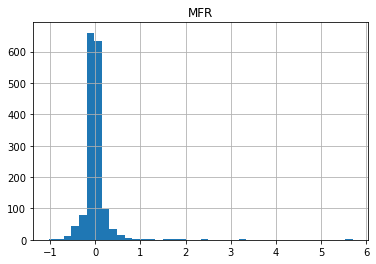

In [103]:
# MFR Distribution (of Log-Transformed and Z-Score factors)

pd.DataFrame(qfl_df_log_z['MFR']).hist(bins = int(np.sqrt(len(qfl_df_log_z['MFR']))));

In [104]:
# Check Infomation Coefficient: MRF (Components: All, Z-Scored & Log-Transformed)

sp_corr_z_log, sp_pval_z_log = stats.spearmanr(-qfl_df_log_z['MFR'].replace(np.nan, 0), qfl_df['p_total_return'].replace(np.nan, 0))
print('Information Coefficient: {0}'.format(round(sp_corr_z_log,2)))
print('Information Coefficient (P-Value): {0}'.format(round(sp_pval_z_log,2)))

Information Coefficient: -0.02
Information Coefficient (P-Value): 0.39


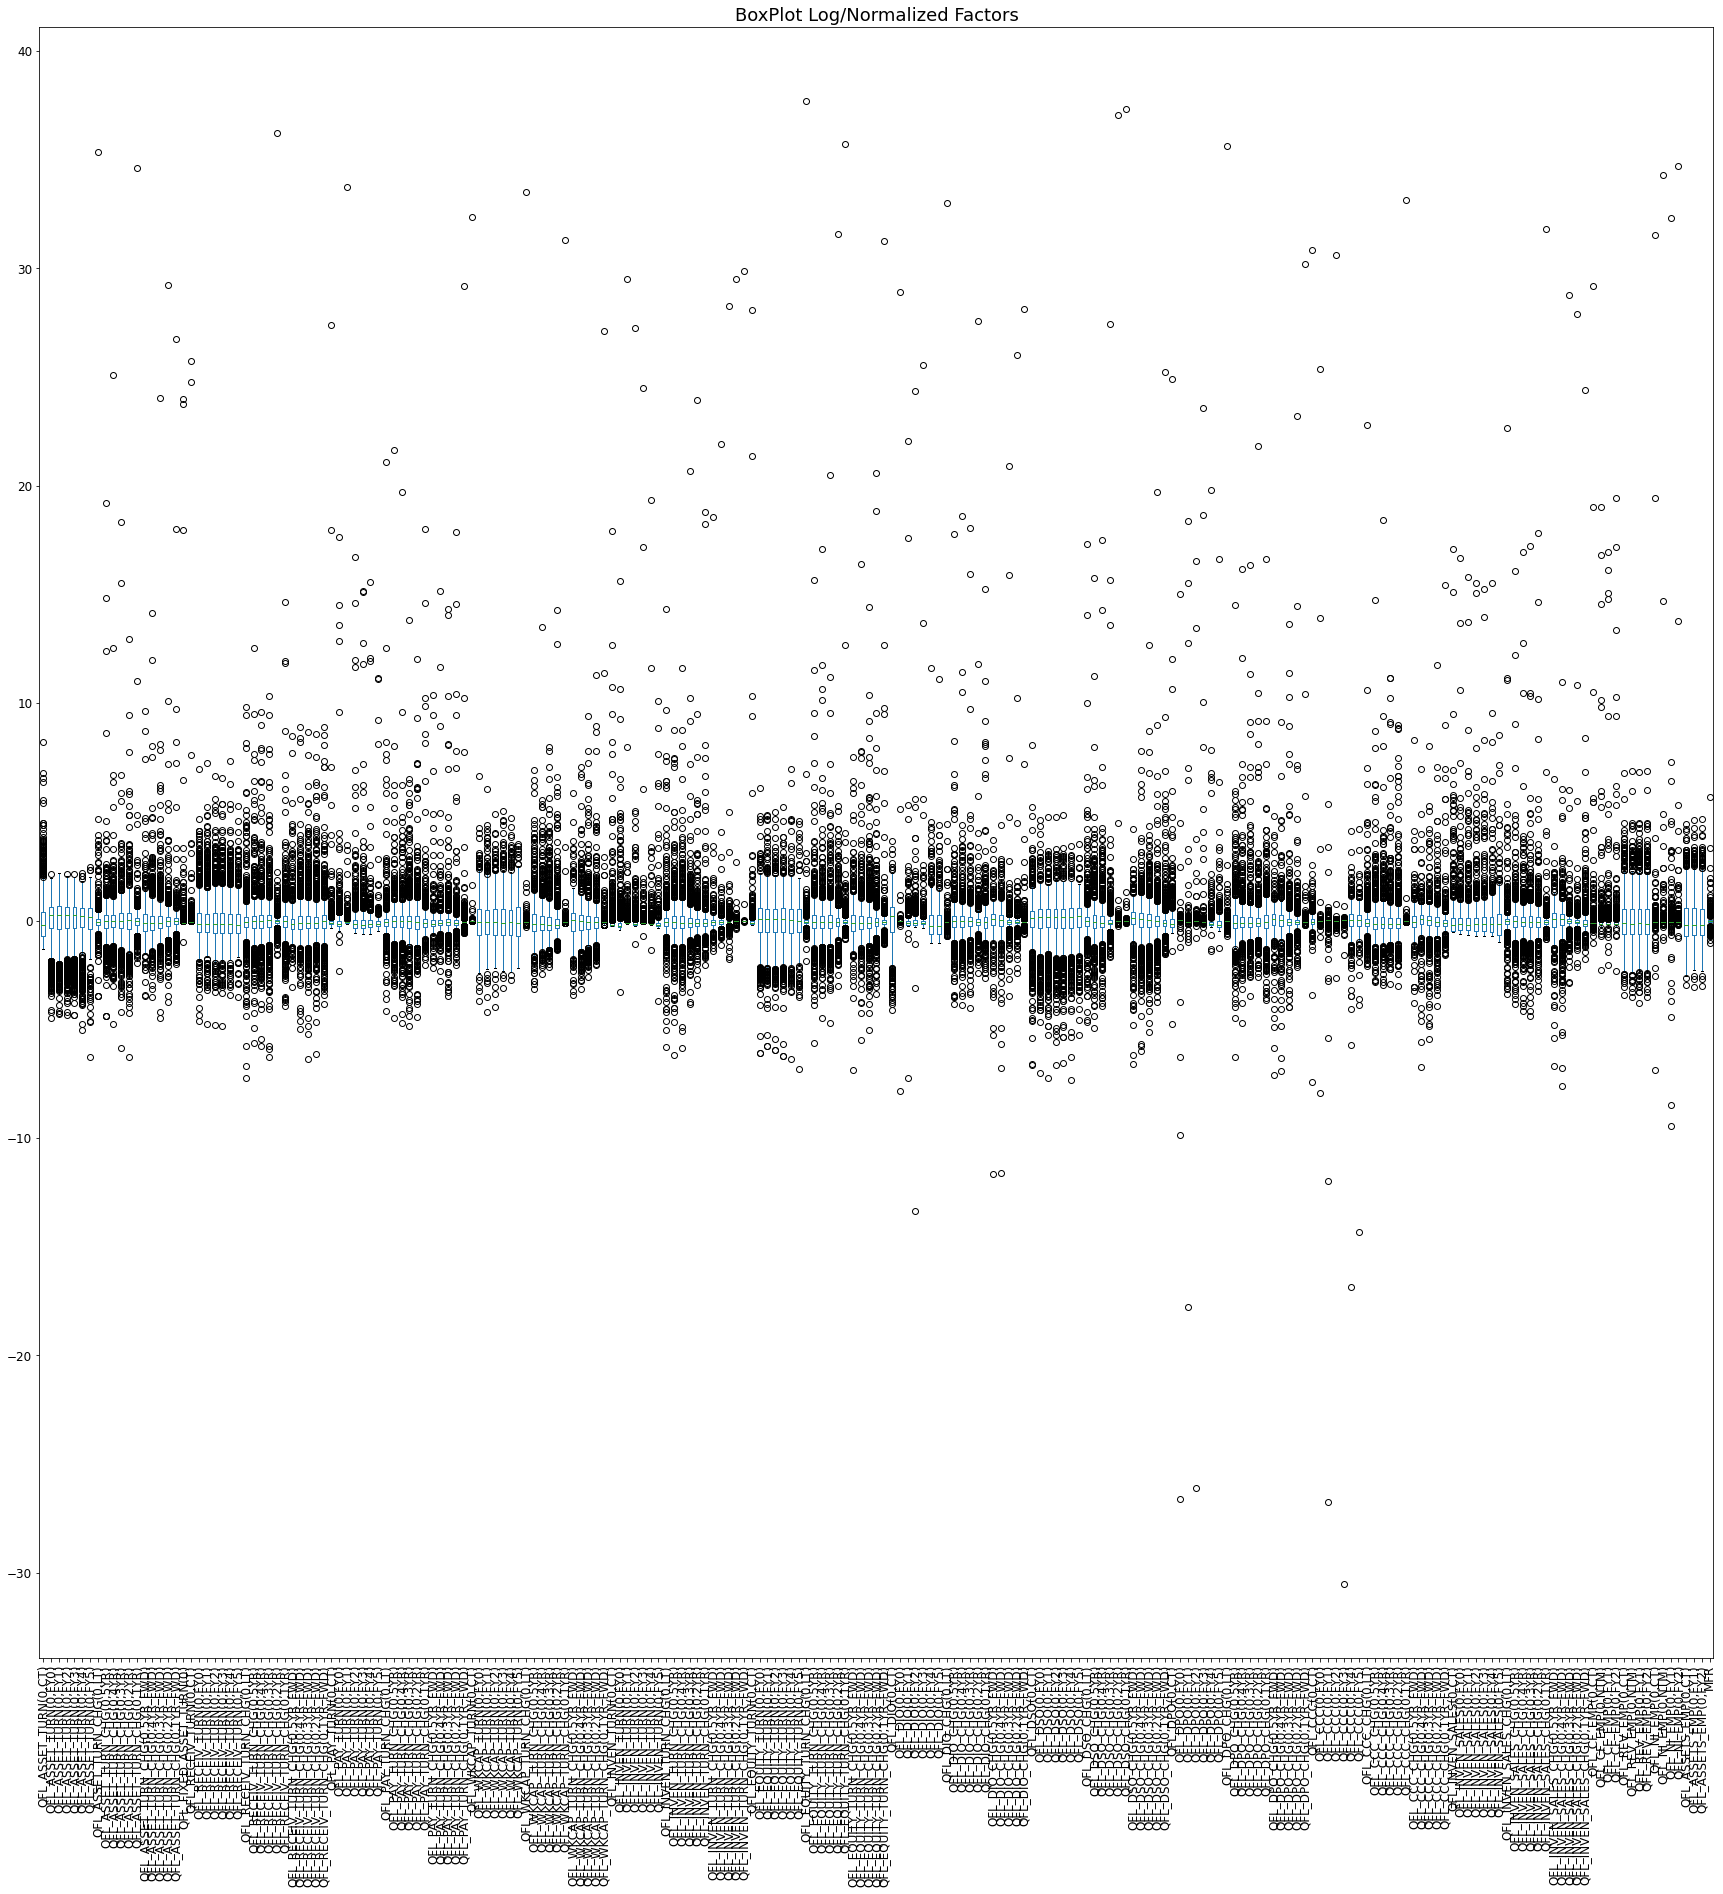

In [105]:
# Box-Whisker plot of Log-Transformed and Z-Score data

qfl_df_log_z.boxplot(grid=False, rot=90, fontsize=12, figsize = (30,30)).set_title('BoxPlot Log/Normalized Factors', fontsize = 18);

In [107]:
# Check Universe Exposures (Geography, Size, Sector)

qfl_df['ison_screen'] = 1

qfl_df.head()

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


,BENCHMARK_ID,DATE,SECURITY_ID,Weight,proper_name,fg_gics_sector,proper,p_total_return,qfl_size_class,qfl_mkt_val_sec,"QFL_ASSET_TURN(0,CT)","QFL_ASSET_TURN(0,FY0)","QFL_ASSET_TURN(0,FY1)","QFL_ASSET_TURN(0,FY2)","QFL_ASSET_TURN(0,FY3)","QFL_ASSET_TURN(0,FY4)","QFL_ASSET_TURN(0,FY5)","QFL_ASSET_TURN_CHG(0,LT)","QFL_ASSET_TURN_CHG(0,5YR)","QFL_ASSET_TURN_CHG(0,4YR)","QFL_ASSET_TURN_CHG(0,3YR)","QFL_ASSET_TURN_CHG(0,2YR)","QFL_ASSET_TURN_CHG(0,1YR)","QFL_ASSET_TURN_CHG(0,5YR_FWD)","QFL_ASSET_TURN_CHG(0,4YR_FWD)","QFL_ASSET_TURN_CHG(0,3YR_FWD)","QFL_ASSET_TURN_CHG(0,2YR_FWD)","QFL_ASSET_TURN_CHG(0,1YR_FWD)",QFL_FIXED_ASSET_TURN(0),"QFL_RECEIV_TURN(0,CT)","QFL_RECEIV_TURN(0,FY0)","QFL_RECEIV_TURN(0,FY1)","QFL_RECEIV_TURN(0,FY2)","QFL_RECEIV_TURN(0,FY3)","QFL_RECEIV_TURN(0,FY4)","QFL_RECEIV_TURN(0,FY5)","QFL_RECEIV_TURN_CHG(0,LT)","QFL_RECEIV_TURN_CHG(0,5YR)","QFL_RECEIV_TURN_CHG(0,4YR)","QFL_RECEIV_TURN_CHG(0,3YR)","QFL_RECEIV_TURN_CHG(0,2YR)","QFL_RECEIV_TURN_CHG(0,1YR)","QFL_RECEIV_TURN_CHG(0,5YR_FWD)","QFL_RECEIV_TURN_CHG(0,4YR_FWD)","QFL_RECEIV_TURN_CHG(0,3YR_FWD)","QFL_RECEIV_TURN_CHG(0,2YR_FWD)","QFL_RECEIV_TURN_CHG(0,1YR_FWD)","QFL_PAY_TURN(0,CT)","QFL_PAY_TURN(0,FY0)","QFL_PAY_TURN(0,FY1)","QFL_PAY_TURN(0,FY2)","QFL_PAY_TURN(0,FY3)","QFL_PAY_TURN(0,FY4)","QFL_PAY_TURN(0,FY5)","QFL_PAY_TURN_CHG(0,LT)","QFL_PAY_TURN_CHG(0,5YR)","QFL_PAY_TURN_CHG(0,4YR)","QFL_PAY_TURN_CHG(0,3YR)","QFL_PAY_TURN_CHG(0,2YR)","QFL_PAY_TURN_CHG(0,1YR)","QFL_PAY_TURN_CHG(0,5YR_FWD)","QFL_PAY_TURN_CHG(0,4YR_FWD)","QFL_PAY_TURN_CHG(0,3YR_FWD)","QFL_PAY_TURN_CHG(0,2YR_FWD)","QFL_PAY_TURN_CHG(0,1YR_FWD)","QFL_WKCAP_TURN(0,CT)","QFL_WKCAP_TURN(0,FY0)","QFL_WKCAP_TURN(0,FY1)","QFL_WKCAP_TURN(0,FY2)","QFL_WKCAP_TURN(0,FY3)","QFL_WKCAP_TURN(0,FY4)","QFL_WKCAP_TURN(0,FY5)","QFL_WKCAP_TURN_CHG(0,LT)","QFL_WKCAP_TURN_CHG(0,5YR)","QFL_WKCAP_TURN_CHG(0,4YR)","QFL_WKCAP_TURN_CHG(0,3YR)","QFL_WKCAP_TURN_CHG(0,2YR)","QFL_WKCAP_TURN_CHG(0,1YR)","QFL_WKCAP_TURN_CHG(0,5YR_FWD)","QFL_WKCAP_TURN_CHG(0,4YR_FWD)","QFL_WKCAP_TURN_CHG(0,3YR_FWD)","QFL_WKCAP_TURN_CHG(0,2YR_FWD)","QFL_WKCAP_TURN_CHG(0,1YR_FWD)","QFL_INVEN_TURN(0,CT)","QFL_INVEN_TURN(0,FY0)","QFL_INVEN_TURN(0,FY1)","QFL_INVEN_TURN(0,FY2)","QFL_INVEN_TURN(0,FY3)","QFL_INVEN_TURN(0,FY4)","QFL_INVEN_TURN(0,FY5)","QFL_INVEN_TURN_CHG(0,LT)","QFL_INVEN_TURN_CHG(0,5YR)","QFL_INVEN_TURN_CHG(0,4YR)","QFL_INVEN_TURN_CHG(0,3YR)","QFL_INVEN_TURN_CHG(0,2YR)","QFL_INVEN_TURN_CHG(0,1YR)","QFL_INVEN_TURN_CHG(0,5YR_FWD)","QFL_INVEN_TURN_CHG(0,4YR_FWD)","QFL_INVEN_TURN_CHG(0,3YR_FWD)","QFL_INVEN_TURN_CHG(0,2YR_FWD)","QFL_INVEN_TURN_CHG(0,1YR_FWD)","QFL_EQUITY_TURN(0,CT)","QFL_EQUITY_TURN(0,FY0)","QFL_EQUITY_TURN(0,FY1)","QFL_EQUITY_TURN(0,FY2)","QFL_EQUITY_TURN(0,FY3)","QFL_EQUITY_TURN(0,FY4)","QFL_EQUITY_TURN(0,FY5)","QFL_EQUITY_TURN_CHG(0,LT)","QFL_EQUITY_TURN_CHG(0,5YR)","QFL_EQUITY_TURN_CHG(0,4YR)","QFL_EQUITY_TURN_CHG(0,3YR)","QFL_EQUITY_TURN_CHG(0,2YR)","QFL_EQUITY_TURN_CHG(0,1YR)","QFL_EQUITY_TURN_CHG(0,5YR_FWD)","QFL_EQUITY_TURN_CHG(0,4YR_FWD)","QFL_EQUITY_TURN_CHG(0,3YR_FWD)","QFL_EQUITY_TURN_CHG(0,2YR_FWD)","QFL_EQUITY_TURN_CHG(0,1YR_FWD)","QFL_DIO(0,CT)","QFL_DIO(0,FY0)","QFL_DIO(0,FY1)","QFL_DIO(0,FY2)","QFL_DIO(0,FY3)","QFL_DIO(0,FY4)","QFL_DIO(0,FY5)","QFL_DIO_CHG(0,LT)","QFL_DIO_CHG(0,5YR)","QFL_DIO_CHG(0,4YR)","QFL_DIO_CHG(0,3YR)","QFL_DIO_CHG(0,2YR)","QFL_DIO_CHG(0,1YR)","QFL_DIO_CHG(0,5YR_FWD)","QFL_DIO_CHG(0,4YR_FWD)","QFL_DIO_CHG(0,3YR_FWD)","QFL_DIO_CHG(0,2YR_FWD)","QFL_DIO_CHG(0,1YR_FWD)","QFL_DSO(0,CT)","QFL_DSO(0,FY0)","QFL_DSO(0,FY1)","QFL_DSO(0,FY2)","QFL_DSO(0,FY3)","QFL_DSO(0,FY4)","QFL_DSO(0,FY5)","QFL_DSO_CHG(0,LT)","QFL_DSO_CHG(0,5YR)","QFL_DSO_CHG(0,4YR)","QFL_DSO_CHG(0,3YR)","QFL_DSO_CHG(0,2YR)","QFL_DSO_CHG(0,1YR)","QFL_DSO_CHG(0,5YR_FWD)","QFL_DSO_CHG(0,4YR_FWD)","QFL_DSO_CHG(0,3YR_FWD)","QFL_DSO_CHG(0,2YR_FWD)","QFL_DSO_CHG(0,1YR_FWD)","QFL_DPO(0,CT)","QFL_DPO(0,FY0)","QFL_DPO(0,FY1)","QFL_DPO(0,FY2)","QFL_DPO(0,FY3)","QFL_DPO(0,FY4)","QFL_DPO(0,FY5)","QFL_DPO_CHG(0,LT)","QFL_DPO_CHG(0,5YR)"

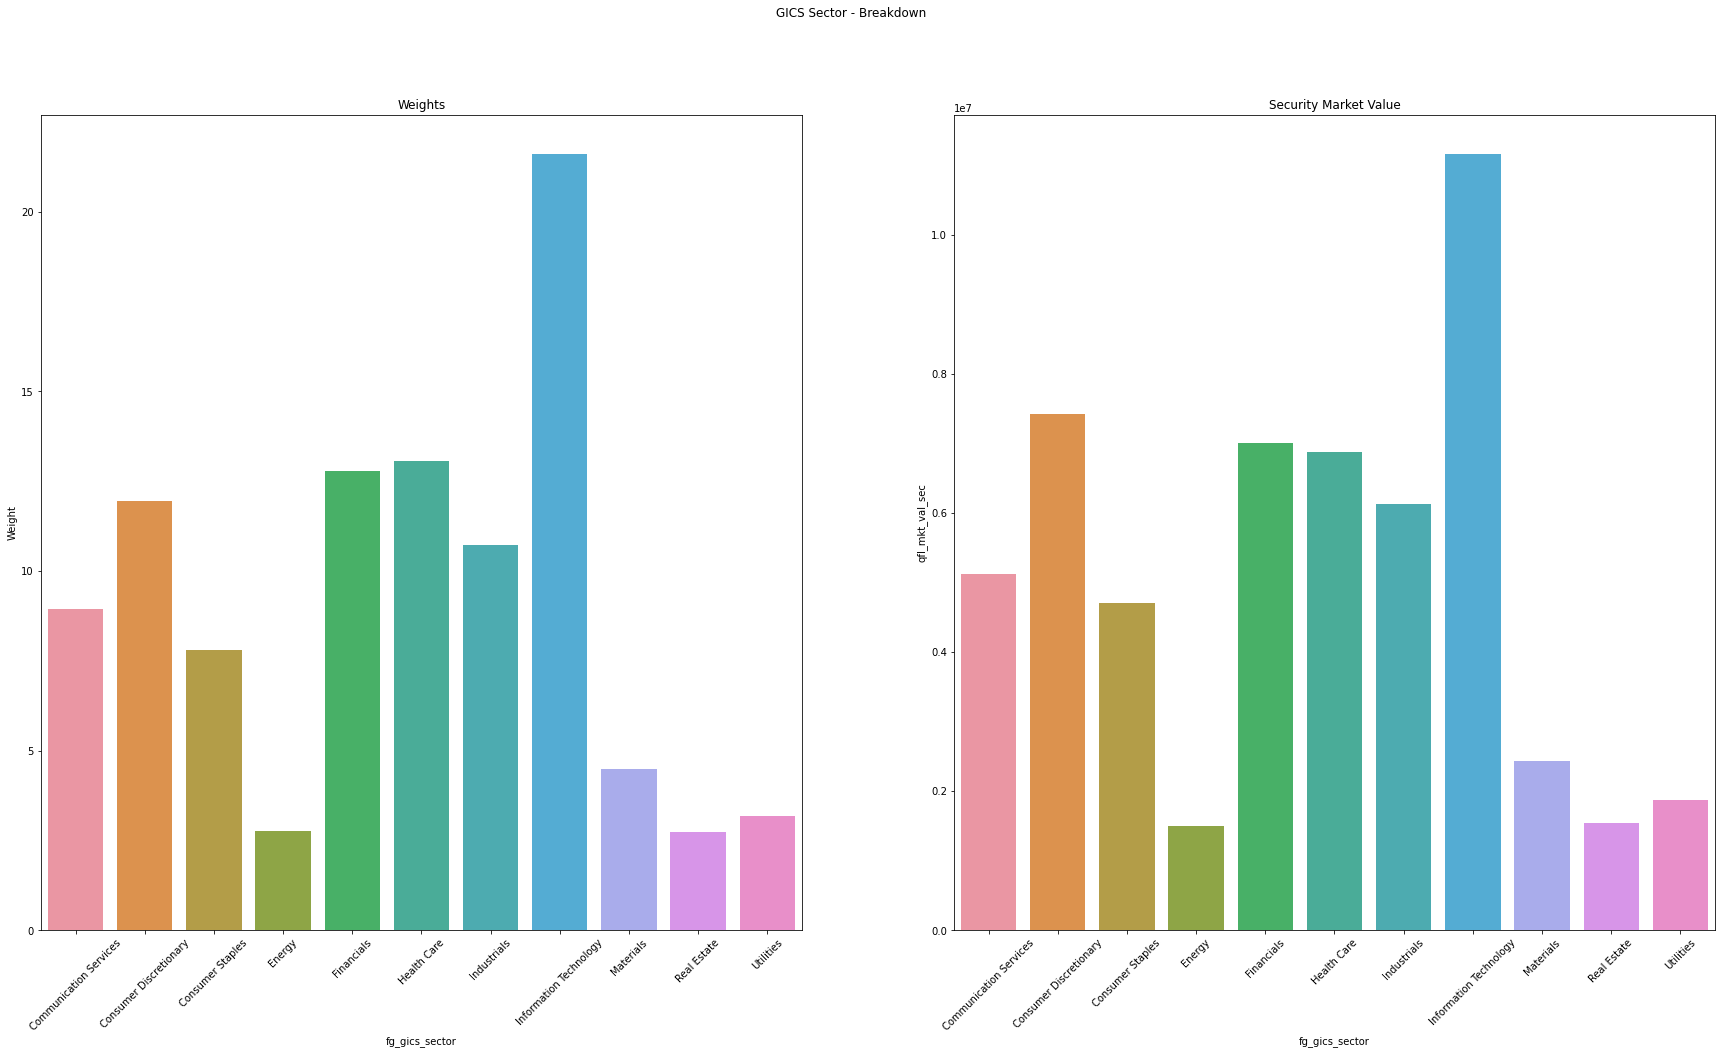

In [106]:
# Group universe

# GICS Sector
GICS_grouped = qfl_df.groupby('fg_gics_sector').sum()

fig, axes = plt.subplots(1, 2, figsize=(30, 15))
fig.suptitle('GICS Sector - Breakdown')
axes[0].set_title('Weights')
axes[1].set_title('Security Market Value')

chart = sns.barplot(ax=axes[0], x = GICS_grouped.index, y = 'Weight', data = GICS_grouped)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart = sns.barplot(ax=axes[1], x = GICS_grouped.index, y = 'qfl_mkt_val_sec', data = GICS_grouped)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

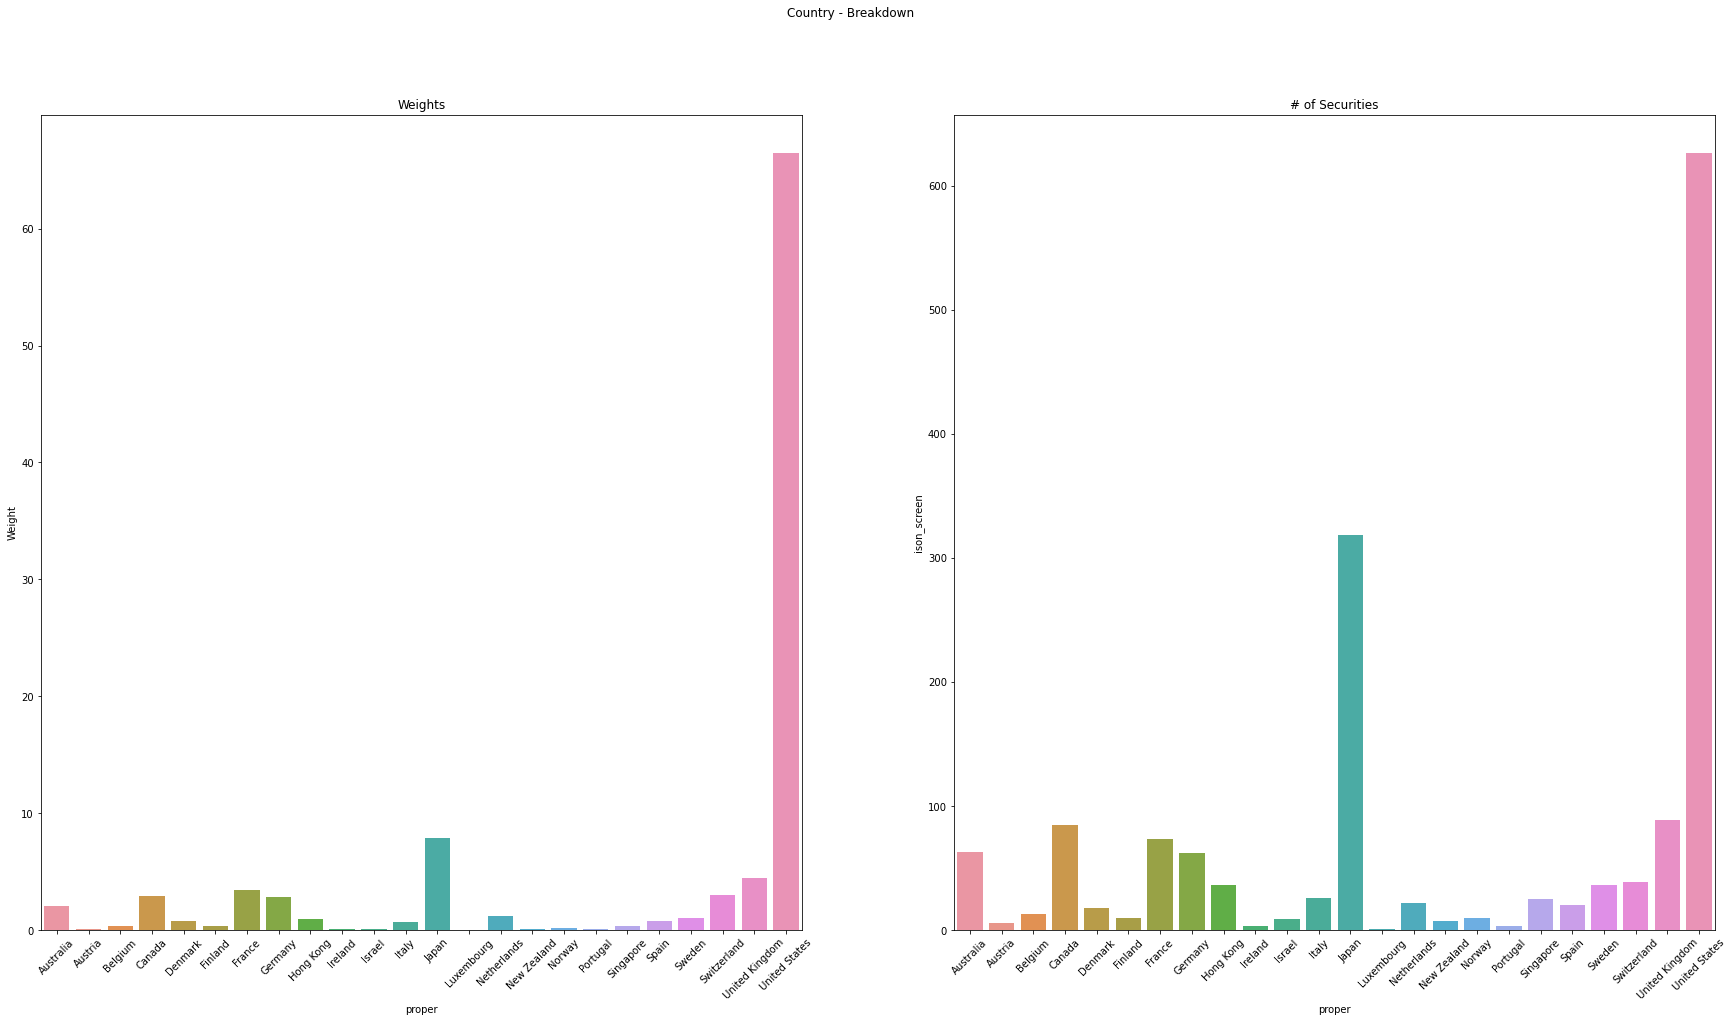

In [108]:
# Group universe

# Country
Country_grouped = qfl_df.groupby('proper').sum()

fig, axes = plt.subplots(1, 2, figsize=(30, 15))
fig.suptitle('Country - Breakdown')
axes[0].set_title('Weights')
axes[1].set_title('# of Securities')

chart = sns.barplot(ax=axes[0], x = Country_grouped.index, y = 'Weight', data = Country_grouped)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart = sns.barplot(ax=axes[1], x = Country_grouped.index, y = 'ison_screen', data = Country_grouped)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

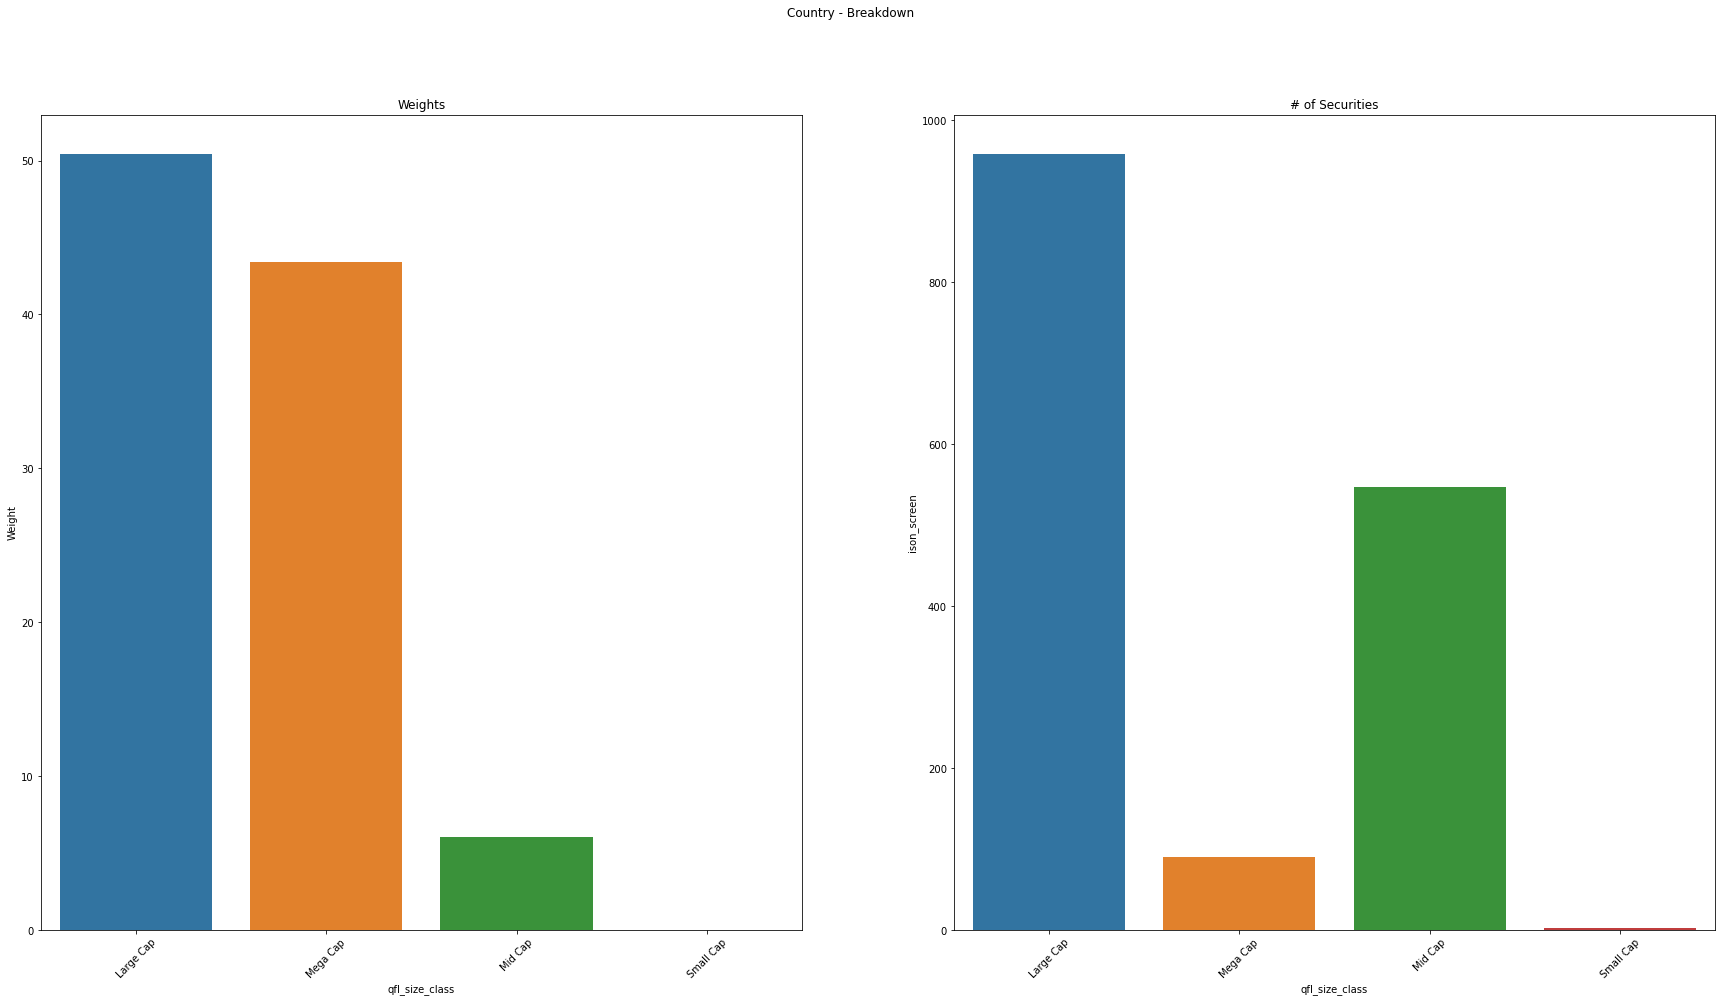

In [109]:
# Group universe

# Size
Size_grouped = qfl_df.groupby('qfl_size_class').sum()

fig, axes = plt.subplots(1, 2, figsize=(30, 15))
fig.suptitle('Country - Breakdown')
axes[0].set_title('Weights')
axes[1].set_title('# of Securities')

chart = sns.barplot(ax=axes[0], x = Size_grouped.index, y = 'Weight', data = Size_grouped)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart = sns.barplot(ax=axes[1], x = Size_grouped.index, y = 'ison_screen', data = Size_grouped)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

In [110]:
# Feature Selection

In [111]:
# Discard features with more than 80 NAs

qfl_filtered = qfl_df[qfl_df[qfl_df.columns[filter_idx]].isna().sum(axis = 0)[qfl_df[qfl_df.columns[filter_idx]].isna().sum(axis = 0) < 80].index]

In [112]:
# Replace NAs for retained features with feature's average

for col in qfl_filtered.columns:
    qfl_filtered[col] = qfl_filtered[col].replace(np.nan, qfl_filtered[col].mean(axis = 0))
    
qfl_df['p_total_return'] = qfl_df['p_total_return'].replace(np.nan, 0);

<ipython-input-112-d861f91d7765>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qfl_filtered[col] = qfl_filtered[col].replace(np.nan, qfl_filtered[col].mean(axis = 0))


In [113]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

X = qfl_filtered
Y = qfl_df['p_total_return']

#RECURSIVE FEATURE ELIMINATION

lin_reg = Lasso()
rfe = RFE(lin_reg, n_features_to_select=3, step = 1)
fit_rfe = rfe.fit(X, Y)
print("Num Features: %s" % (fit_rfe.n_features_))
print("Selected Features: %s" % (fit_rfe.support_))
print("Feature Ranking: %s" % (fit_rfe.ranking_))


Num Features: 3
Selected Features: [False False False False False False  True  True False False False False
 False False False False  True False False False False False False False]
Feature Ranking: [22 21 20 19 18  2  1  1 16 14  7  3  8  4 17 15  1  6 13 12  5 10 11  9]


In [114]:
qfl_filtered.columns[fit_rfe.support_]

Index(['QFL_ASSET_TURN_CHG(0,5YR)', 'QFL_ASSET_TURN_CHG(0,4YR)',
       'QFL_EQUITY_TURN(0,FY2)'],
      dtype='object')

In [115]:
qfl_filtered[qfl_filtered.columns[fit_rfe.support_]].corr()

,"QFL_ASSET_TURN_CHG(0,5YR)","QFL_ASSET_TURN_CHG(0,4YR)","QFL_EQUITY_TURN(0,FY2)"
"QFL_ASSET_TURN_CHG(0,5YR)",1.00000,0.600550,0.002460
"QFL_ASSET_TURN_CHG(0,4YR)",0.60055,1.000000,0.001839
"QFL_EQUITY_TURN(0,FY2)",0.00246,0.001839,1.000000


In [116]:
qfl_filtered[qfl_filtered.columns[fit_rfe.support_]]

,"QFL_ASSET_TURN_CHG(0,5YR)","QFL_ASSET_TURN_CHG(0,4YR)","QFL_EQUITY_TURN(0,FY2)"
0,0.493574,5.108416,6.238876
1,1.268411,5.369520,1.131920
2,-6.942570,-8.339823,4.081920
3,8.695185,5.870187,0.733035
4,3.776038,2.325809,0.729449
...,...,...,...
1595,-0.825387,-1.318228,0.147827
1596,-0.019193,0.686407,0.583466
1597,-3.176147,-2.760804,0.149312
1598,-6.186175,-7.855976,3.968792


In [117]:
# MFR Z-Score after Feature Selection

qfl_mfr_RFE = pd.DataFrame()

for factor in qfl_filtered[qfl_filtered.columns[fit_rfe.support_]]:
    z_score_RFE = ( qfl_filtered[factor] - qfl_filtered[factor].mean() ) / qfl_filtered[factor].std()
    qfl_mfr_RFE[factor] = z_score_RFE

qfl_mfr_RFE['MFR'] = qfl_mfr_RFE.mean(axis = 1)

qfl_mfr_RFE.head()

,"QFL_ASSET_TURN_CHG(0,5YR)","QFL_ASSET_TURN_CHG(0,4YR)","QFL_EQUITY_TURN(0,FY2)",MFR
0,0.210521,0.620957,0.469467,0.433648
1,0.288896,0.643598,-0.131101,0.267131
2,-0.541644,-0.545215,0.215813,-0.290349
3,1.040113,0.687014,-0.178009,0.516373
4,0.542542,0.379661,-0.178431,0.247924


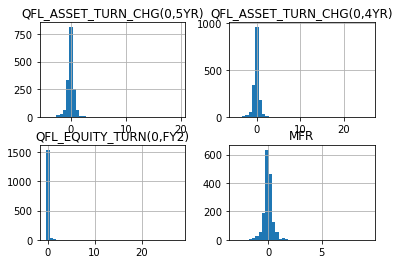

In [118]:
qfl_mfr_RFE.hist(bins = int(np.sqrt(len(qfl_mfr_RFE['MFR']))));

In [ ]:
# Check Infomation Coefficient: MFR (Components: RFE's Feature Selected, Z-Scored)

sp_corr_z_rfe, sp_pval_z_rfe = stats.spearmanr(-qfl_mfr_RFE['MFR'].replace(np.nan, 0), qfl_df['p_total_return'].replace(np.nan, 0))
print('Information Coefficient: {0}'.format(round(sp_corr_z_rfe,2)))
print('Information Coefficient (P-Value): {0}'.format(round(sp_pval_z_rfe,2)))

# Information Coefficient Summary (LVRB)

### Feature Selection: Recoursive Feature Elimination (RFE + Lasso) (3 Top Components)

In [119]:
print('Information Coefficient: {0}'.format(round(sp_corr_z_rfe,2)))
print('Information Coefficient (P-Value): {0}'.format(round(sp_pval_z_rfe,2)))

Information Coefficient: -0.08
Information Coefficient (P-Value): 0.0


### Z-Score + Log-Transformation (All Components)

In [120]:
print('Information Coefficient: {0}'.format(round(sp_corr_z_log,2)))
print('Information Coefficient (P-Value): {0}'.format(round(sp_pval_z_log,2)))

Information Coefficient: -0.02
Information Coefficient (P-Value): 0.39


### Z-Score Only (All Components)

In [ ]:
print('Information Coefficient: {0}'.format(round(sp_corr_z,2)))
print('Information Coefficient (P-Value): {0}'.format(round(sp_pval_z,2)))